---
---
 ***FINAL PROJECT PURWADHIKA (JCDS ON CAMPUS BANDUNG)***
 ***HOTEL BOOKINGS DEMAND PREDICTION USING MACHINE LEARNING ALGORITHM (PART 2)***

**Muhammad Rasyaa Alif Fauzan, Mohammad Kiflano Hazman, Athaya Zahrani Irmansyah** 

<div style="display: flex; justify-content: center; align-items: center;">
    <img src="Illustration1.webp" alt="Illustration1" style="width: 300px; margin-right: 30px;">
    <img src="Illustration2.webp" alt="Illustration2" style="width: 300px; margin-right: 30px;">
    <img src="Illustration3.webp" alt="Illustration3" style="width: 300px; margin-right: 30px;">
</div>

---
---
# **F. Modeling**
Setelah menyelesaikan proses analisis di poin E. Langkah selanjutnya adalah `melakukan modeling menggunakan algoritma Machine Learning`. Machine Learning adalah adalah cabang dari kecerdasan buatan (AI) yang fokus pada pengembangan algoritma dan model yang memungkinkan komputer untuk belajar dari data dan membuat prediksi atau keputusan tanpa pemrograman eksplisit. Penjelasan lebih lanjut terkait Machine Learning dan turunannya dapat dilihat pada laman berikut: [Machine Learning](https://www.researchgate.net/publication/347059772_Machine_LearningA_Review). Di bawah ini merupakan libraries yang akan digunakan dalam tahapan modeling.

In [212]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Data Splitting
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Preprocessing
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# Resampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# ML Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Metrics
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import fbeta_score, make_scorer

# Ignore Warning
import warnings
warnings.filterwarnings("ignore")

# Import Data
df=pd.read_csv('hotel_bookings.csv')

---
## 1. Pendahuluan

**Tujuan**

Modeling pada bagian ini bertujuan untuk membuat suatu `pemodelan data hotel untuk memprediksi pembatalan reservasi hotel yang berfungsi sebagai dasar strategi dalam meningkatkan revenue`. Pemodelan ini diharapkan dapat memberikan wawasan yang mendalam tentang perilaku, karakteristik, dan preferensi tamu. Dengan memahami faktor-faktor yang memengaruhi keputusan pembatalan, hotel dapat mengembangkan strategi yang lebih terarah, seperti penawaran promosi untuk periode tertentu atau overbooking. Hal ini memungkinkan hotel untuk meningkatkan tingkat hunian dan mengurangi potensi kehilangan pendapatan akibat pembatalan.

**Machine Learning**

Pemodelan dengan machine learning dilakukan sebagai pendekatan untuk menganalisis dan memprediksi perilaku pelanggan terkait pembatalan reservasi hotel. `Tujuan dari pemodelan ini adalah untuk mengidentifikasi pemesanan yang berkemungkinan tinggi akan dibatalkan`, sehingga hotel dapat menyusun strategi dalam mengoptimalkan revenue. Dengan informasi ini, hotel dapat mengurangi tingkat pembatalan dan meningkatkan pendapatan secara keseluruhan. Dalam pemodelan ini apabila terjadi pembatalan akan disebut sebagai kelas positif dan apabila tidak terjadi pembatalan akan disebut sebagai kelas negatif.

Dataset memiliki kolom is_canceled yang merupakan label berupa informasi dari baris data yang mengindikasikan apakah tamu melakukan pembatalan booking atau tidak. Berdasarkan informasi tersebut, model machine learning yang dibuat merupakan model supervised klasifikasi karena memiliki label. Beberapa model yang dapat digunakan pada kasus klasifikasi antara lain:

1. `Logistic Regression`

    Logistic regression adalah model sederhana namun efektif untuk membuat prediksi kemungkinan sebuah kejadian misalnya dalam kasus ini adalah pembatalan booking berdasarkan feature-feature dari calon tamu hotel. Model ini memiliki kelebihan bahwa hasil prediksi cenderung mudah diinterpretasikan sehingga dapat menjadi titik awal untuk melakukan analisis.

2. `KNeighborsClassifier`

    KNeighborsClassifier bekerja dengan membandingkan setiap bookingan dengan tetangga terdekatnya dan membuat prediksi berdasarkan outcome yang paling sering terjadi diantara kelompok ini. Model ini dapat menangkap pola yang kompleks yang berguna ketika keputusan calon tamu untuk membatalkan bookingan dipengaruhi dari banyak faktor.

3. `Decision Tree`

    Decision Tree membagi data menjadi cabang berdasarkan nilai fiturnya kemudian menghasilkan berbagai outcome yang menunjukkan apakah sebuah booking dibatalkan atau tidak. Decision tree dapat menunjukkan secara jelas faktor apa saja yang penting ketika memprediksi calon tamu akan melakukan pembatalan atau tidak.

4. `Voting Classifer (Hard)`

    Voting Classifier (Hard) menggabungkan beberapa model dan memprediksi outcome berdasarkan keputusan mayoritas. Pendekatan ini meningkatkan akurasi dengan memanfaatkan kelebihan dari beberapa model sehingga prediksi lebih reliabel.

5. `Voting Classifier (Soft)`

    Voting Classifier (Soft) menggabungkan prediksi dari beberapa model dengan menghitung rata-rata probabilitas yang diprediksi oleh setiap model dan memilih kelas dengan probabilitas rata-rata tertinggi. Pendekatan ini memungkinkan classifier mempertimbangkan tidak hanya hasil yang paling mungkin dari setiap model, tetapi juga tingkat kepercayaan dalam prediksi tersebut, sehingga menghasilkan prediksi yang lebih halus dan sering kali lebih akurat.

6. `Stacking Classifier`

    Stacking Classifier adalah metode ensemble yang menggabungkan beberapa model machine learning dengan melatih meta-model untuk membuat prediksi akhir. Setiap model dasar membuat prediksinya, dan meta-model menggunakan prediksi ini sebagai input untuk mempelajari cara menggabungkannya guna mencapai akurasi keseluruhan yang terbaik. 

7. `Random Forest Classifier`

    Random Forest Classifier adalah metode ensemble yang membangun beberapa Decision Tree dan menggabungkan prediksi mereka untuk meningkatkan akurasi dan mengurangi overfitting. Setiap pohon dalam hutan dilatih pada subset data dan fitur yang dipilih secara acak, dan prediksi akhir dibuat dengan mengambil suara mayoritas dari semua pohon. 

8. `AdaBoost Classifier`

    AdaBoost Classifier adalah teknik ensemble yang meningkatkan kinerja model-model lemah, biasanya Decision Tree, dengan memfokuskan pada instance yang salah diklasifikasikan oleh model sebelumnya. Metode ini bekerja dengan memberikan bobot lebih tinggi pada instance yang salah klasifikasi dan membangun rangkaian model yang bertujuan untuk memperbaiki kesalahan dari pendahulunya. 

9. `GradientBoosting Classifier`

    Gradient Boosting Classifier adalah metode ensemble yang membangun model secara berurutan, di mana setiap model baru memperbaiki kesalahan yang dibuat oleh model sebelumnya. Metode ini bekerja dengan meminimalkan fungsi kerugian dan secara bertahap meningkatkan akurasi prediksi.

10. `XGB Classifier`

    XGBClassifier adalah implementasi Gradient Boosting yang dioptimalkan untuk kecepatan dan kinerja. Ini menggabungkan teknik regularisasi canggih untuk mencegah overfitting, sehingga tetap tangguh bahkan dengan dataset yang kompleks. XGBoost sangat efisien dan skalabel, menjadikannya pilihan populer untuk menangani dataset besar dengan banyak fitur dan hubungan yang kompleks, seperti yang terlibat dalam memprediksi pembatalan hotel.

---
## 2. Strategi dan Metrik

**Strategi : Overbooking**

[Overbooking](https://oaky.com/en/blog/hotel-overbooking) adalah `praktik yang umum dilakukan khususnya dalam industri perhotelan di mana penyedia layanan memesan lebih banyak tempat atau kamar daripada kapasitas yang sebenarnya tersedia`. Ini dilakukan dengan harapan bahwa beberapa pelanggan tidak akan muncul (no-show) atau akan membatalkan reservasi mereka.

Alasan  Overbooking:
- No-Show: Banyak pelanggan yang tidak hadir pada waktu reservasi mereka, sehingga mengakibatkan kerugian pendapatan bagi penyedia layanan.
- Pembatalan: Beberapa pelanggan membatalkan reservasi di menit-menit terakhir, yang juga dapat menyebabkan kekosongan yang tidak terisi.
- Maksimalkan Pendapatan: Dengan memesan lebih banyak tempat dari kapasitas yang ada, perusahaan berharap dapat memaksimalkan pendapatan mereka dengan mengisi kursi atau kamar yang mungkin kosong.

Risiko Overbooking:
- Kepuasan Pelanggan: Jika semua pelanggan hadir, beberapa mungkin tidak mendapatkan tempat yang telah mereka pesan, yang dapat menyebabkan ketidakpuasan dan kerugian reputasi.
- Penanganan Masalah: Penyedia layanan harus memiliki rencana darurat untuk menangani situasi overbooking, seperti menawarkan kompensasi, mengalihkan pelanggan ke lokasi lain, atau memberikan upgrade.

Praktik Umum:
- Pengelolaan Data: Banyak perusahaan menggunakan analisis data dan algoritma untuk memperkirakan tingkat no-show dan pembatalan, sehingga dapat menentukan berapa banyak tempat yang harus mereka overbook.
Kebijakan: Penyedia layanan sering kali memiliki kebijakan tertentu untuk mengelola overbooking, termasuk tawaran kompensasi bagi pelanggan yang terkena dampak.

Secara keseluruhan, `overbooking adalah strategi yang dapat menguntungkan jika dikelola dengan baik, tetapi juga memiliki risiko yang perlu diperhatikan agar pelanggan tetap puas`. Dalam kasus ini, rincian dari strategi yang disimulasikan adalah sebagai berikut:
1. Pemesanan yang diperkirakan akan dibatalkan akan tetap tersedia untuk dijual, sehingga memungkinkan terjadinya dua pemesanan untuk kamar yang sama.
2. Jika dua orang yang memesan kamar sama-sama hadir, maka pemesan pertama akan mendapatkan kamar tersebut. Sementara itu, pemesan kedua akan menerima kompensasi berupa sebesar 30% dari harga kamar.

Kemudian untuk mengukur dampak dari strategi yang dilakukan digunakanlah nilai "expected revenue", untuk mengetahui apa itu "expected revenue" dijelaskan terlebih dahulu apa itu `ADR`, `nilai harapan`, dan `probabilitas gabungan `.

**Average Daily Rate (ADR)**

[Average Daily Rate (ADR)](https://www.investopedia.com/terms/a/average-daily-rate.asp#:~:text=The%20average%20daily%20rate%20(ADR)%20measures%20the%20average%20rental%20revenue,the%20revenue%20per%20available%20room.) adalah salah satu indikator penting dalam industri perhotelan yang mengukur `pendapatan rata-rata yang diperoleh hotel per kamar yang terisi dalam satu hari`. ADR dihitung dengan membagi total pendapatan kamar dengan jumlah kamar yang terisi. Angka ini memberikan gambaran tentang efektivitas strategi harga hotel dan tingkat permintaan pasar. Dengan menganalisis ADR, manajemen hotel dapat mengevaluasi performa mereka, menyesuaikan tarif, dan meningkatkan profitabilitas. Selain itu, ADR juga dapat digunakan untuk membandingkan kinerja hotel dengan kompetitor, sehingga membantu dalam pengambilan keputusan untuk meningkatkan daya tarik dan pelayanan.

$$ 
P(ADR) = \frac{TP}{KT}
$$
di mana:
- TP merupakan total pendapatan
- KT merupakan jumlah kamar terisi


**Probabilitas Gabungan**

Probabilitas gabungan (joint probability) adalah `probabilitas terjadinya dua atau lebih peristiwa secara bersamaan`. Misalnya, jika kita memiliki dua peristiwa, 
A dan B, probabilitas gabungan dilambangkan dengan P(A∩B), yang menunjukkan kemungkinan bahwa keduaperistiwa tersebut terjadi sekaligus. Formula untuk menghitung probabilitas gabungan dapat dinyatakan sebagai:
$$ 
P(A \cap B) = P(A) \times P(B | A) 
$$
di mana:
- P(A) adalah probabilitas terjadinya peristiwa A
- P(B∣A) adalah probabilitas terjadinya peristiwa B dengan syarat bahwa peristiwa A telah terjadi.

**Nilai Harapan**

Expected value (nilai harapan) adalah `konsep dalam teori probabilitas yang menggambarkan rata-rata hasil yang diharapkan dari suatu eksperimen acak`. Dalam konteks variabel acak diskrit, nilai harapan dihitung dengan mengalikan setiap kemungkinan hasil dengan probabilitas terjadinya hasil tersebut, kemudian menjumlahkan semua nilai tersebut. Formula untuk menghitung expected value E(X) untuk variabel acak diskrit X adalah sebagai berikut:

$$
E(X) = \sum_{i=1}^{n} x_i \cdot P(x_i)
$$

di mana:
- x_i adalah hasil yang mungkin,
- P(x_i) adalah probabilitas dari hasil \(xi\),
- n adalah jumlah total hasil yang mungkin.


**Pendapatan yang Diharapkan (Expected Revenue) dan Metrik**

Setelah mengetahui apa itu ADR, probabilitas gabungan, dan nilai harapan. Kita dapat menyusun nilai pendapatan yang diharapkan berdasarkan strategi yang dilakukan yaitu overbooking. Dimana pendapata yang diharapkan dapat didefinisikan dengan


$$
E(X) =  x_1 \cdot P(x_1)+x_2 \cdot P(x_2)+x_3 \cdot P(x_3)
$$

di mana:
- x1 merupakan pendapatan disaat hanya pemesan pertama datang
- x2 merupakan pendapatan disaat hanya pemesan overbook datang
- x3 merupakan pendapatan disaat kedua pemesan datang. 

Berikut merupakan tabel dari ekspektasi revenue:

|Nilai Aktual|Nilai Prediksi|Label|Expected Revenue|Keterangan|
|-|-|-|-|-|
|Batal|Batal|True Positive|x1 * 0% + x2 * P(x2) + x3 * 0%|Probabilitas kedua pemesan datang 0% karena pemesan pertama tidak datang|
|Batal|Datang|False Negative|x1 * 0% + x2 * 0% + x3 * 0%|Probabilitas pemesan overbook datang 0% karena `kamar tidak di overbook`|
|Datang|Datang|True Negative|x1 * 100% + x2 * 0% + x3 * 0%|Probabilitas pemesan overbook datang 0% karena `kamar tidak di overbook`|
|Datang|Batal|False Positive|x1 * P(x1) + x2 * 0% + x3 * P(x3)|Probabilitas hanya pemesan overbook datang 0% karena pemesan pertama datang|

Dapat disederhanakan menjadi :
|Nilai Aktual|Nilai Prediksi|Label|Expected Revenue|
|-|-|-|-|
|Batal|Batal|True Positive|x2 * P(x2)|
|Batal|Datang|False Negative|0|
|Datang|Datang|True Negative|x1|
|Datang|Batal|False Positive|x1 * P(x1) + x3 * P(x3)|

Kemudian untuk menghitung probabilitas dari x1,x2, dan x3 dibutuhkan perhitungan probabilitas dari suatu ruangan akan di pesan dan pesanannya berhasil (tidak dibatalkan) atau probabilitas kamar diisi. `Diasumsikan bahwa probabilitas dari kamar diisi antara pemesanan biasa dan pemesanan overbooking adalah sama`. Berikut merupakan perhitungannya:

$$ 
P = P(A) \times P(B | A) 
$$
di mana:
- A merupakan kejadian dimana kamar dipesan
- B merupakan kejadian dimana kamar yang dipesan tidak dibatalkan
- P adalah P(A ∩ B) yaitu probabilitas dari suatu kamar dipesan dan tidak dibatalkan (probabilitas kamar diisi)

di mana P, P(A), dan P(B|A) dapat didapatkan dengan:

$$ 
P(A) = \frac{KP}{K}
$$
$$ 
P(B | A)  = \frac{KPB}{KP}
$$

sehingga didapatkan P:
$$ 
P = \frac{KPB}{K}
$$

di mana:
- K Jumlah Kamar
- KP Jumlah Kamar yang dipemesan
- KPB Jumlah Kamar yang dipesan dan tidak dibatalkan (Jumlah kamar teriisi)

Kemudian nilai P dapat dimasukan kedalam tabel expected revenue menjadi :

|Nilai Aktual|Nilai Prediksi|Label|Expected Revenue|Keterangan|
|-|-|-|-|-|
|Batal|Batal|True Positive|x2 * P||
|Batal|Datang|False Negative|0||
|Datang|Datang|True Negative|x1||
|Datang|Batal|False Positive|x1 * (1-P) + x3 * P|Probabilitas dari hanya pemesan pertama yang datang adalah 100% dikurangi probabilitas pemesan kedua datang|

Kemudian nilai x1,x2, dan x3 didapatkan dari nilai median ADR di tiap hotel di setiap bulannya dikalikan dengan jumlah malam menginap.

|Simbol|Arti|Nilai|Penjelasan|
|-|-|-|-|
|x1|Pendapatan ketika hanya pemesan pertama yang datang|ADR * M||
|x2|Pendapatan ketika hanya pemesan overbook yang datang|ADR * M||
|x3|Pendapatan ketika kedua pemesan datang|(ADR - 30% ADR) * M|Pendapatan dikurangi 30% untuk membayar kompensasi kepada pemesan overbook|

di mana M adalah jumlah malam menginap.

|Nilai Aktual|Nilai Prediksi|Label|Expected Revenue|
|-|-|-|-|
|Batal|Batal|True Positive|ADR * M * P|
|Batal|Datang|False Negative|0|
|Datang|Datang|True Negative|ADR* M|
|Datang|Batal|False Positive|ADR * M  * (1-P) + (ADR(1-30%)) * P * M |

Disederhanakan menjadi :

|Nilai Aktual|Nilai Prediksi|Label|Expected Revenue|
|-|-|-|-|
|Batal|Batal|True Positive|ADR * M * P|
|Batal|Datang|False Negative|0|
|Datang|Datang|True Negative|ADR * M|
|Datang|Batal|False Positive|ADR(1 - 30% * P) * M |

Didapatkan bahwa false negative berdampak kerugian berupa kehilangan kemungkinan pendapatan revenue sebesar P dari ADR dan false positive berdampak kerugian berupa kemungkinan pengeluaran sebesar 30% dikalikan P dari ADR. Oleh karena itu kerugian akibat false negative dapat dikatakan lebih besar dibangingkan kerugian akibat false positive. Maka dari itu nilai dari recall dianggap lebih penting dibandingkan nilai precision sehingga **`metrik yang digunakan dalam pemodelan ini adalah metrik F2`** namun juga dicoba beberapa model dengan metrik yang lain yaitu `f1` dan `average recall`. Berikut merupakan metrik yang dipakai dalam pemodelan :

|Metrik|Alasan|
|-|-|
|F1|Mencari model yang memiliki nilai recall dan precision terbaik yang nantinya thresholdnya akan di sesuaikan untuk meningkatkan pendapatan|
|F2 (Metrik Utama)|Dampak dari false negative lebih besar dibandingkan false positive|
|ROC AUC|Mencari model dengan dengan kinerja di berbagai threshold yang terbaik|

---
## 3. Feature

### A. Feature Numerikal

Terdapat 12 feature numerikal yang digunakan dalam pemodelan antara lain adalah :
|Feature|Keterangan|
|-|-|
|lead_time|Lamanya waktu pemesanan sebelum kedatangan dalam hari|
|stays_in_weekend_nights|Banyaknya hari weekend pemesanan dalam hari|
|stays_in_week_nights|Banyaknya hari non weekend pemesanan dalam hari|
|adults|Banyaknya pengunjung dewasa|
|children|Banyaknya pengunjung anak-anak|
|babies|Banyaknya pengunjung bayi|
|previous_cancellations|Jumlah pembatalan sebelumnya|
|previous_bookings_not_canceled|Jumlah pemesanan berhasil sebelumnya|
|booking_changes|Jumlah perubahan booking|
|days_in_waiting_list|Lamannya pesanan masuk kedalam waiting list dalam hari|
|required_car_parking_spaces|Jumlah parkir mobil yang dibutuhkan pengunjung|
|total_of_special_requests|Jumlah request dari pengunjung|

Kolom numerikal yang tidak dimasukan kedalam feature adalah `adr` karena `adr` didapatkan disaat hari kedatangan sedangkan model ingin memprediksi pembatalan sebelum hari kedatangan.

### B. Feature Kategorikal

Terdapat 13 Feature kategorikal yang digunakan dalam pemodelan antara lain adalah :
|Feature|Keterangan|
|-|-|
|hotel|Hotel yang dipesan| 
|arrival_date_month|Bulan dari hari kedatangan| 
|meal|Jenis makanan yang dipesan| 
|country|Negara asal pemesan| 
|market_segment|Segmentasi pasar pemesan|
|distribution_channel|Cara memesan hotel| 
|reserved_room_type|Tipe kamar yang dipesan| 
|deposit_type|Tipe deposito yang dibayarkan pemesan| 
|customer_type|Tipe pemesan| 
|is_repeated_guest|Apakah pengunjung sudah pernah berkunjung sebelumnya|
|agent|ID agen pemesan hotel|
|is_same_room|Apakah kamar yang dipesan dan diberikan sama|
|arrival_day_type|Jenis hari kedatangan (weekend atau weekday)|

Kolom kategorikal yang tidak dimasukan kedalam feture antara lain:

1. `company` : Karena siapa yang membayar pemesanan dianggap tidak mempengaruhi pembatalan
2. `assigned_room_type` : Karena diwakilkan variabel is_same_room dimana apabila assigned room sama dengan reserved room akan bernilai 1
3. `reservation_status` : Karena merupakan penjelasan dari status pembatalan, tidak dimasukan agar tidak terjadi data leakage
4. `reservation_status_date` : Karena tanggal status reservasi terakhir didapatkan ketika pemesan sudah diketahui akan batal atau tidak
5. `arrival_date_year` : Karena model digunakan untuk memprediksi pebatalan untuk tahun kedepannya
6. `arrival_date_week_number` dan arrival_date_day_of_month : Karena sudah diwakilkan oleh kolom `arrival_date_month` dan `arrival_day_type`

---
## 4. Preprocessing

### A. Missing Value

Berikut merupakan nilai missing value dari feature yang ada :

In [23]:
df_selected = df.loc[:, ~df.columns.isin(['company'])]
df_missing=pd.DataFrame(df_selected.isna().sum())
df_missing.rename(columns={0:'Jumlah Missing Value'},inplace=True)
df_missing['Persentase (%)']=round(df_missing['Jumlah Missing Value']/len(df_selected)*100,3)
df_missing[df_missing['Jumlah Missing Value']!=0]

,Jumlah Missing Value,Persentase (%)
children,4,0.003
country,488,0.409
agent,16340,13.686


Dalam pemodelan ini dilakukan missing value handling yaitu dengan cara :
1. `children` : Missing value akan diisi dengan median karena median dapat merepresentasikan data yang hilang berdasarkan nilai data yang sudah ada.
2. `country` dan `agent`: Missing value akan dilabelkan dengan 'unknown' karena untuk mempertahankan integritas data, memfasilitasi analisis, dan mencegah kesalahan dalam model machine learning. Ini adalah praktik berguna dalam pra-pemrosesan data untuk mengelola dataset yang tidak lengkap secara efektif.

### B. Data Duplikat

Berikut merupakan banyaknya data duplikat yang ada didalam data

In [435]:
print(f'Jumlah data duplikat {df.duplicated().sum()}')
print(f'Persentase jumlah duplikat {df.duplicated().sum()/len(df)*100}%')

Jumlah data duplikat 31994
Persentase jumlah duplikat 26.797889270458164%


Didalam pemodelan ini data duplikat tidak dihilangkan agar perhitungan pendapatan dapat sesuai dengan keadaannya yang sebenarnya.

### C. Outlier

Berikut merupakan banyaknya outlier dari setiap feture numerikal yang ada :

In [24]:
kolom_numerikal = ['lead_time','stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children','babies', 'previous_cancellations','previous_bookings_not_canceled', 'booking_changes','days_in_waiting_list', 'required_car_parking_spaces','total_of_special_requests']
tabel_outlier = pd.DataFrame(columns = ['Median' , 'Batas Bawah' , 'Batas Atas' , 'Jumlah Outlier' , 'Persentase Outlier (%)'])
for kolom in kolom_numerikal:
    Q1 = df[kolom].quantile(0.25)
    Q2 = df[kolom].quantile(0.5)
    Q3 = df[kolom].quantile(0.75)
    batas_atas = Q3 + 1.5 * (Q3 - Q1)
    batas_bawah = Q1 - 1.5 * (Q3 - Q1)
    tabel_outlier.loc[kolom] = [df[kolom].median(), batas_bawah, batas_atas, len(df[(df[kolom]>batas_atas) | (df[kolom]<batas_bawah)]), len(df[(df[kolom]>batas_atas) | (df[kolom]<batas_bawah)]) / len(df) * 100]
display(tabel_outlier.round(2))

,Median,Batas Bawah,Batas Atas,Jumlah Outlier,Persentase Outlier (%)
lead_time,69.0,-195.0,373.0,3005.0,2.52
stays_in_weekend_nights,1.0,-3.0,5.0,265.0,0.22
stays_in_week_nights,2.0,-2.0,6.0,3354.0,2.81
adults,2.0,2.0,2.0,29710.0,24.88
children,0.0,0.0,0.0,8590.0,7.19
babies,0.0,0.0,0.0,917.0,0.77
previous_cancellations,0.0,0.0,0.0,6484.0,5.43
previous_bookings_not_canceled,0.0,0.0,0.0,3620.0,3.03
booking_changes,0.0,0.0,0.0,18076.0,15.14
days_in_waiting_list,0.0,0.0,0.0,3698.0,3.10


Didapatkan bahwa terdapat outlier diseluruh kolom numerikal, maka dilakukan winsorize dimana nilai outlier akan diubah menjadi percentile 99% dan nantinya dibandingkan performanya dengan yang tidak menggunakan winsorize. [Winsorization](https://www.researchgate.net/publication/284500200_Winsorize_2010) adalah salah satu metode, di antara banyak metode lainnya, untuk menangani masalah outlier dalam distribusi data. Teknik yang digunakannya adalah dengan cara mengubah nilai-nilai ekstrem (outlier) dalam dataset dengan menggantinya menggunakan nilai tertentu dari data yang lebih "normal" atau umum. Biasanya, nilai-nilai ekstrem ini diganti dengan nilai yang berada pada kuartil tertentu (misalnya, kuartil pertama dan kuartil ketiga) dari distribusi data.

### D. Kardinalitas

Dalam konteks machine learning, [kardinalitas](https://help.qlik.com/en-US/cloud-services/Subsystems/Hub/Content/Sense_Hub/AutoML/cardinality.htm#:~:text=The%20cardinality%20is%20the%20uniqueness,high%20number%20of%20unique%20values.) merujuk pada `jumlah nilai unik yang terdapat dalam suatu fitur atau variabel`. Pemahaman tentang kardinalitas penting karena dapat mempengaruhi pemilihan algoritma, teknik pemrosesan data, dan hasil model. Di bawah ini merupakan penjelasan lebih lanjut mengenai kardinalitas:

1. `Kardinalitas Fitur`:
- Kardinalitas Tinggi: Fitur dengan banyak nilai unik, seperti kolom "ID pelanggan" atau "alamat email". Fitur semacam ini sering kali memerlukan teknik khusus, seperti encoding atau pengelompokan, karena banyaknya kategori dapat menyebabkan model menjadi kompleks.
- Kardinalitas Rendah: Fitur dengan sedikit nilai unik, seperti kolom "jenis kelamin" (pria dan wanita). Fitur ini lebih mudah untuk diolah dan biasanya dapat langsung digunakan dalam model.
2. `Pengaruh terhadap Algoritma`:
- Algoritma tertentu lebih baik untuk menangani fitur dengan kardinalitas rendah, seperti pohon keputusan, sementara yang lain, seperti regresi logistik, mungkin lebih sensitif terhadap kardinalitas tinggi.
- Fitur dengan kardinalitas tinggi dapat menyebabkan masalah seperti overfitting, di mana model terlalu menyesuaikan diri dengan data pelatihan dan tidak dapat generalisasi dengan baik ke data baru.

`Kardinalitas dapat memengaruhi metrik evaluasi model`. Misalnya, dalam model klasifikasi, jika salah satu kelas memiliki kardinalitas yang jauh lebih tinggi, model mungkin cenderung memprediksi kelas tersebut, yang dapat menyebabkan bias.

In [ ]:
pd.DataFrame({
    'Model': model_name3,
    'Resampler': resampler_name3,
    'Scaler': scaler_name3,
    'Winsorize':oh_name3,
    'Accuracy Test score':score_accuracy3,
    'ROC AUC Test score':list_score3,
    'Mean ROC AUC Train Score': score_mean3,
    'std': score_std3,
    'CV Score' : all_score3,
}).sort_values('ROC AUC Test score', ascending=False).head(5).reset_index(drop=True)

,Model,Resampler,Scaler,Winsorize,Accuracy Test score,ROC AUC Test score,Mean ROC AUC Train Score,std,CV Score
0,RandomForestClassifier,NoneType,NoneType,NoneType,0.883510,0.954194,0.948062,0.002102,"[0.9503, 0.9487, 0.9452]"
1,RandomForestClassifier,NoneType,StandardScaler,NoneType,0.883845,0.954133,0.948063,0.002090,"[0.9502, 0.9487, 0.9452]"
2,RandomForestClassifier,NoneType,NoneType,Winsorizer,0.882270,0.953823,0.948509,0.002131,"[0.9508, 0.9491, 0.9457]"
3,RandomForestClassifier,NoneType,StandardScaler,Winsorizer,0.882471,0.953815,0.948557,0.002075,"[0.9508, 0.9491, 0.9458]"
4,RandomForestClassifier,RandomOverSampler,NoneType,Winsorizer,0.881634,0.953731,0.948021,0.002011,"[0.9502, 0.9485, 0.9453]"


Didalam pemodelan ini, kelompok data yang jumlahnya kurang dari 5% akan dikategorikan sebagai 'other', hal ini dilakukan untuk mencegah adanya data yang terdapat didalam data testing namun tidak terdapat didalam data training. Mengkelompokan rare label juga berguna untuk memperkecil besarnya dimensi data setelah encoding.

In [25]:
results = {}
columns=['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment','distribution_channel', 'reserved_room_type','deposit_type', 'customer_type']
for column in columns:
    if column in df.columns:
        # Menghitung frekuensi label
        label_counts = df[column].value_counts(normalize=True)
        
        # Menghitung total label
        total_labels = len(label_counts)
        non_rare_labels_count = (label_counts[label_counts >= 0.05]).count()
        # Menghitung jumlah label dengan frekuensi kurang dari 5%
        rare_labels_count = (label_counts[label_counts < 0.05]).count()
        
        # Menyimpan hasil ke dictionary
        results[column] = {
            'total_labels': total_labels,
            'non_rare_labels_count':non_rare_labels_count,
            'rare_labels_count': rare_labels_count
        }
    else:
        results[column] = "Column not found in DataFrame"
results_df = pd.DataFrame(results)
results_df.T

,total_labels,non_rare_labels_count,rare_labels_count
hotel,2,2,0
arrival_date_month,12,11,1
meal,5,3,2
country,177,5,172
market_segment,8,4,4
distribution_channel,5,3,2
reserved_room_type,10,3,7
deposit_type,3,2,1
customer_type,4,2,2


Didapatkan terdapat rare label hampir disetiap feature kategorikal, didalam pemodelan ini dilakukan handling berupa :
1. `hotel` : Tidak terdapat rare label
2. `arrival_date_month` : Rare label dibiarkan karena merupakan bulan dalam 1 tahun
3. `meal` : Rare label dikelompokan menjadi 'other'
4. `country` : Rare label dikelompokan menjadi 'other'
5. `market_segment` : Rare label dikelompokan menjadi 'other'
6. `distribution_channel` :	Rare label dikelompokan menjadi 'other'
7. `reserved_room_type` : Rare label dikelompokan menjadi 'other'
8. `deposit_type` : Rare label dikelompokan menjadi 'other'
9. `customer_type` : Rare label dikelompokan menjadi 'other'

 Rare label yang dikelompokan menjadi 'other' bertujuan untuk membantu dalam menyederhanakan data, mencegah overfitting, dan meningkatkan kinerja model machine learning. Hal ini juga memudahkan interpretasi dan analisis hasil.

### E. Encoding

Encoding yang digunakan terhadap feature kategorikal dalam pemodelan ini adalah one hot encoder, one hot encoder dipilih karena kemudahan dalam menginterpretasinya dan data kategorikal yang ada bukanlah data ordinal (data yang memiliki tingkat).

---
## 5. Feature dan Target

Dilakukan pemisahan antara feature dan target dari data, yang kemudian data dibagi menjadi data training dan data testing, pada pemodelan ini digunakan 25% data sebagai data testing dan sisanya sebagai data training.

In [378]:
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

---
## 6. Class

Di dalam pemodelan ini, seluruh tahap preprocessing dilakukan didalam pipeline, oleh karena itu dibuat beberapa class sebagai berikut:
1. `Remove` : Berfungsi untuk `menghapus kolom yang tidak masuk kedalam feature`
2. `Prepro` : Berfungsi untuk `menentukan tipe data dan membuat feature baru` yaitu `arrival_day_type` dan `is_same_room`
3. `RareLabelTransformer` : Berfungsi untuk `mengubah rare label` menjadi 'other'
4. `Winsorizer` : Berfungsi untuk `mengubah outlier` menjadi bernilai sebesar batas atas
5. `MissingValueImputer` : Berfungsi untuk `mengisi missing value`


### **Class Remove**

`Kelas Remove` dirancang untuk digunakan dalam konteks pemrosesan data, khususnya untuk `menghapus kolom yang tidak masuk ke dalam feature (tidak diperlukan)`. Kelas ini mengikuti pola umum yang sering digunakan dalam pemrograman berbasis objek dan pengembangan pipeline dalam machine learning. Kelas ini dapat dengan mudah diintegrasikan ke dalam alur kerja yang lebih besar untuk pra-pemrosesan data.

In [27]:
class Remove:
    def __init__(self, columns_to_remove=None):

        self.columns_to_remove = columns_to_remove if columns_to_remove is not None else []

    def fit(self, X, y=None):

        if isinstance(X, pd.DataFrame):
            self.columns_to_remove = [col for col in self.columns_to_remove if col in X.columns]
        return self

    def transform(self, X,y=None):

        return X.drop(columns=self.columns_to_remove, errors='ignore')

    def fit_transform(self, X, y=None):

        return self.fit(X, y).transform(X)

### **Class Prepro**

`Kelas Prepro` dirancang untuk melakukan pra-pemrosesan pada DataFrame yang berisi informasi tentang kedatangan, termasuk pengolahan tanggal, klasifikasi hari kerja dan akhir pekan, serta pengecekan tipe kamar. Kelas ini mengikuti pola umum dalam pemrograman berbasis objek dan dapat diintegrasikan ke dalam pipeline pemrosesan data dalam machine learning.

In [86]:
class Prepro:
    def __init__(self):

        pass

    def fit(self, X, y=None):

        return self

    def transform(self, X):
        def check_weekday_weekend(date):
            if date.weekday() < 5:
                return "Weekday"
            else:
                return "Weekend"
        def arrival_month(date):
            if "January" in date:
                return date.replace("January", "01")
            elif "February" in date:
                return date.replace("February", "02")
            elif "March" in date:
                return date.replace("March", "03")
            elif "April" in date:
                return date.replace("April", "04")
            elif "May" in date:
                return date.replace("May", "05")
            elif "June" in date:
                return date.replace("June", "06")
            elif "July" in date:
                return date.replace("July", "07")
            elif "August" in date:
                return date.replace("August", "08")
            elif "September" in date:
                return date.replace("September", "09")
            elif "October" in date:
                return date.replace("October", "10")
            elif "November" in date:
                return date.replace("November", "11")
            elif "December" in date:
                return date.replace("December", "12")
        X['arrival_date'] = X['arrival_date_year'].map(str) + "-" + X['arrival_date_month'].map(str) + "-" + X['arrival_date_day_of_month'].map(str)
        X['arrival_date'] = X['arrival_date'].apply(arrival_month)
        X['arrival_date'] = pd.to_datetime(X['arrival_date'])
        X["arrival_day_type"] = X['arrival_date'].apply(check_weekday_weekend)
        X['is_same_room']=X.apply(lambda x: 1 if x['reserved_room_type'] == x['assigned_room_type'] else 0, axis=1)
        X['agent'] = X['agent'].astype(str)
        return X

    def fit_transform(self, X, y=None):

        return self.fit(X, y).transform(X)

### **Class RareLabelTransformer**

`Kelas RareLabelTransformer` dirancang untuk menangani label yang jarang dalam DataFrame dengan cara mengubahnya menjadi label 'Other'. Ini membantu dalam mengurangi kompleksitas data dan mencegah masalah yang terkait dengan terlalu banyak kategori dalam analisis dan modeling machine learning. Kelas ini mengikuti pola umum dalam pemrograman berbasis objek dan dapat dengan mudah diintegrasikan ke dalam pipeline pra-pemrosesan data.

In [29]:
class RareLabelTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns, threshold=0.01):

        self.columns = columns
        self.threshold = threshold

    def fit(self, X, y=None):

        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input data must be a pandas DataFrame.")
        
        self.nonrare_labels_ = {}
        
        for column in self.columns:
            if column in X.columns:
                value_counts = X[column].value_counts(normalize=True)
                nonrare_labels = value_counts[value_counts >= self.threshold].index
                self.nonrare_labels_[column] = nonrare_labels
        
        return self

    def transform(self, X):

        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input data must be a pandas DataFrame.")
        
        X_transformed = X.copy()
        
        for column in self.columns:
            if column in X_transformed.columns:
                nonrare_labels = self.nonrare_labels_.get(column, [])
                X_transformed[column] = X_transformed[column].apply(lambda x: 'Other' if x not in nonrare_labels else x)
        
        return X_transformed

    def fit_transform(self, X, y=None):

        self.fit(X)
        return self.transform(X)

### **Class Winsorizer**

`Kelas Winsorizer` dirancang untuk melakukan Winsorization pada DataFrame, yang membantu mengurangi efek outlier dengan membatasi nilai pada persentil tertentu. Kelas ini mengikuti pola pemrograman berbasis objek dan dapat diintegrasikan ke dalam pipeline pra-pemrosesan data untuk analisis lebih lanjut atau modeling dalam machine learning.

In [30]:
class Winsorizer:
    def __init__(self, columns, lower_percentile=1, upper_percentile=99):

        self.columns = columns
        self.lower_percentile = lower_percentile
        self.upper_percentile = upper_percentile
        self.lower_bounds = {}
        self.upper_bounds = {}
    
    def fit(self, df,y=None):

        for column in self.columns:
            if column not in df.columns:
                raise ValueError(f"Column '{column}' not found in DataFrame")
            
            lower_bound = df[column].quantile(self.lower_percentile / 100)
            upper_bound = df[column].quantile(self.upper_percentile / 100)
            
            self.lower_bounds[column] = lower_bound
            self.upper_bounds[column] = upper_bound
    
    def transform(self, df,y=None):

        df_transformed = df.copy()
        
        for column in self.columns:
            if column not in df.columns:
                raise ValueError(f"Column '{column}' not found in DataFrame")
            
            lower_bound = self.lower_bounds.get(column)
            upper_bound = self.upper_bounds.get(column)
            
            # Apply Winsorization
            df_transformed[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
        
        return df_transformed

    def fit_transform(self, train_df,y=None):

        self.fit(train_df)
        return self.transform(train_df)

### **Class MissingValueImputer**

`Kelas MissingValueImputer` dirancang untuk menangani nilai yang hilang dalam DataFrame dengan cara yang sistematis. Kolom numerik diisi dengan median, sementara kolom kategorikal diisi dengan label 'unknown'. Kelas ini mengikuti pola pemrograman berbasis objek dan dapat dengan mudah diintegrasikan ke dalam pipeline pra-pemrosesan data untuk analisis lebih lanjut atau modeling dalam machine learning.

In [47]:
class MissingValueImputer(BaseEstimator, TransformerMixin):
    def __init__(self, numerical_columns, categorical_columns):
        self.numerical_columns = numerical_columns
        self.categorical_columns = categorical_columns
        self.medians = {}
    
    def fit(self, X, y=None):
        # Calculate medians for numerical columns
        for col in self.numerical_columns:
            self.medians[col] = X[col].median()
    
    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame
        
        # Impute numerical columns
        for col in self.numerical_columns:
            X.fillna({col: self.medians[col]},inplace=True)
        # Impute categorical columns
        for col in self.categorical_columns:
            X.fillna({col: 'unknown'},inplace=True)
        
        return X

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

---
## 7. Model Selection

In [118]:
# Scoring=====================================================
f1_score = make_scorer(fbeta_score, beta=1)

#Resampler=====================================================
rus=RandomUnderSampler(random_state=0)
ros=RandomOverSampler(random_state=0)

#Models=====================================================
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)
logreg_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('modeling', logreg)
])
knn_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('modeling', knn)
])
dtree_pipeline = Pipeline([
    ('modeling', tree)
])
meta_logreg = LogisticRegression(max_iter=1000)
voting_hard = VotingClassifier(
    estimators=[
        ('clf1', logreg_pipeline),
        ('clf2', knn_pipeline),
        ('clf3', dtree_pipeline)
    ], voting='hard'
)
voting_soft = VotingClassifier(
    estimators=[
        ('clf1', logreg_pipeline),
        ('clf2', knn_pipeline),
        ('clf3', dtree_pipeline)
    ], voting='soft'
)
stacking = StackingClassifier(
    estimators=[
        ('clf1', logreg_pipeline),
        ('clf2', knn_pipeline),
        ('clf3', dtree_pipeline)
    ],
    final_estimator=meta_logreg
)
rf = RandomForestClassifier(random_state=0)
adaboost = AdaBoostClassifier(random_state=0)
gradboost = GradientBoostingClassifier(random_state=0)
xgboost = XGBClassifier(random_state=0, verbosity=0)

#Scaler=====================================================
standar=StandardScaler()
minmax=MinMaxScaler()
robust=RobustScaler()

#Winsorizer=====================================================
winsor=Winsorizer(columns=['lead_time','stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children','babies', 'previous_cancellations','previous_bookings_not_canceled', 'booking_changes','days_in_waiting_list', 'required_car_parking_spaces','total_of_special_requests'])

#Encoder=====================================================
from sklearn.compose import ColumnTransformer
encode = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['hotel', 'arrival_date_month', 'meal','country', 'market_segment', 'distribution_channel','is_repeated_guest' , 'reserved_room_type','deposit_type', 'agent','customer_type','total_of_special_requests', 'arrival_day_type', 'is_same_room'])
], remainder='passthrough')

### **A. F1 Score**

In [122]:
models = [logreg, knn, tree, voting_hard, voting_soft, stacking, rf, adaboost, gradboost, xgboost]
scalers = [None,standar]
resamplers = [None,ros] 
outlierhandling = [None,winsor]
score_mean = []
score_std = []
all_score = []
model_name = []
list_score=[]
resampler_name=[]
scaler_name=[]
oh_name=[]
score_accuracy=[]
# Mencari model terbaik berdasarkan rerata score score terkecil dan std terkecil
for oh in outlierhandling:
    for scaler in scalers:
        for resampler in resamplers:
            for algoritma in models:

                model_pipe = Pipeline([
                    ('Prepro',Prepro()),
                    ('MVI', MissingValueImputer(categorical_columns=['country','agent'],numerical_columns=['children'])),
                    ('Resampler', resampler),
                    ('RLT', RareLabelTransformer(threshold=0.05,columns=['meal', 'country', 'market_segment','distribution_channel', 'reserved_room_type','deposit_type', 'customer_type','agent'])),
                    ('Remove', Remove(columns_to_remove=['adr','company','assigned_room_type','reservation_status','reservation_status_date','arrival_date_year','arrival_date_week_number','arrival_date','arrival_date_day_of_month'])),
                    ('Winsorizer',oh),
                    ('Encoding', encode),
                    ('scaler', scaler),
                    ('model', algoritma)
                ])

                skfold = StratifiedKFold(n_splits = 3)

                model_cv = cross_val_score(
                    model_pipe,                 # model yang sudah dimasukkan ke dalam pipeline
                    X_train,                    # data sebelum di preprocessing
                    y_train, 
                    cv = skfold, 
                    scoring = 'f1',
                    error_score='raise'
                    )
                
                model_pipe.fit(X_train, y_train)
                y_pred = model_pipe.predict(X_test)
                score = fbeta_score(y_test, y_pred,beta=1)
                list_score.append(score)
                score_accuracy.append(accuracy_score(y_test, y_pred))
                score_mean.append(model_cv.mean())
                score_std.append(model_cv.std())
                all_score.append(model_cv.round(4))
                oh_name.append(oh.__class__.__name__)
                model_name.append(algoritma.__class__.__name__)
                resampler_name.append(resampler.__class__.__name__)
                scaler_name.append(scaler.__class__.__name__)

In [356]:
pd.DataFrame({
    'Model': model_name,
    'Resampler': resampler_name,
    'Scaler': scaler_name,
    'Winsorize':oh_name,
    'Accuracy Test score':score_accuracy,
    'F1 Test score':list_score,
    'Mean F1 Train Score': score_mean,
    'std': score_std,
    'CV Score' : all_score,
}).sort_values('F1 Test score', ascending=False).head(10).reset_index(drop=True)

,Model,Resampler,Scaler,Winsorize,Accuracy Test score,F1 Test score,Mean F1 Train Score,std,CV Score
0,RandomForestClassifier,RandomOverSampler,NoneType,NoneType,0.882471,0.840647,0.831327,0.002639,"[0.8332, 0.8332, 0.8276]"
1,RandomForestClassifier,RandomOverSampler,StandardScaler,NoneType,0.882337,0.840436,0.831356,0.002459,"[0.8331, 0.8331, 0.8279]"
2,RandomForestClassifier,RandomOverSampler,StandardScaler,Winsorizer,0.881567,0.839296,0.831055,0.002976,"[0.8347, 0.831, 0.8275]"
3,RandomForestClassifier,RandomOverSampler,NoneType,Winsorizer,0.881634,0.839241,0.831072,0.003019,"[0.8348, 0.831, 0.8274]"
4,RandomForestClassifier,NoneType,StandardScaler,NoneType,0.883845,0.838857,0.829070,0.003047,"[0.8311, 0.8313, 0.8248]"
5,RandomForestClassifier,NoneType,NoneType,NoneType,0.883510,0.838407,0.829129,0.003234,"[0.8311, 0.8317, 0.8246]"
6,RandomForestClassifier,NoneType,StandardScaler,Winsorizer,0.882471,0.836716,0.829206,0.002411,"[0.8311, 0.8307, 0.8258]"
7,RandomForestClassifier,NoneType,NoneType,Winsorizer,0.882270,0.836391,0.829209,0.002594,"[0.8314, 0.8307, 0.8256]"
8,XGBClassifier,RandomOverSampler,NoneType,Winsorizer,0.866423,0.827827,0.824622,0.003303,"[0.8292, 0.8233, 0.8214]"
9,XGBClassifier,RandomOverSampler,StandardScaler,Winsorizer,0.866423,0.827827,0.824622,0.003303,"[0.8292, 0.8233, 0.8214]"


### **B. F2 Score**

In [124]:
f2_score = make_scorer(fbeta_score, beta=2)
models = [logreg, knn, tree, voting_hard, voting_soft, stacking, rf, adaboost, gradboost, xgboost]
scalers = [None,standar]
resamplers = [None,ros] 
outlierhandling = [None,winsor]
score_mean2 = []
score_std2 = []
all_score2 = []
model_name2 = []
list_score2=[]
resampler_name2=[]
scaler_name2=[]
oh_name2=[]
score_accuracy2=[]
# Mencari model terbaik berdasarkan rerata score score terkecil dan std terkecil
for oh in outlierhandling:
    for scaler in scalers:
        for resampler in resamplers:
            for algoritma in models:

                model_pipe = Pipeline([
                    ('Prepro',Prepro()),
                    ('MVI', MissingValueImputer(categorical_columns=['country','agent'],numerical_columns=['children'])),
                    ('Resampler', resampler),
                    ('RLT', RareLabelTransformer(threshold=0.05,columns=['meal', 'country', 'market_segment','distribution_channel', 'reserved_room_type','deposit_type', 'customer_type','agent'])),
                    ('Remove', Remove(columns_to_remove=['adr','company','assigned_room_type','reservation_status','reservation_status_date','arrival_date_year','arrival_date_week_number','arrival_date','arrival_date_day_of_month'])),
                    ('Winsorizer',oh),
                    ('Encoding', encode),
                    ('scaler', scaler),
                    ('model', algoritma)
                ])

                skfold = StratifiedKFold(n_splits = 3)

                model_cv = cross_val_score(
                    model_pipe,                 # model yang sudah dimasukkan ke dalam pipeline
                    X_train,                    # data sebelum di preprocessing
                    y_train, 
                    cv = skfold, 
                    scoring = f2_score,
                    error_score='raise'
                    )
                
                model_pipe.fit(X_train, y_train)
                y_pred = model_pipe.predict(X_test)
                score = fbeta_score(y_test, y_pred,beta=2)
                list_score2.append(score)
                score_accuracy2.append(accuracy_score(y_test, y_pred))
                score_mean2.append(model_cv.mean())
                score_std2.append(model_cv.std())
                all_score2.append(model_cv.round(4))
                oh_name2.append(oh.__class__.__name__)
                model_name2.append(algoritma.__class__.__name__)
                resampler_name2.append(resampler.__class__.__name__)
                scaler_name2.append(scaler.__class__.__name__)

In [357]:
pd.DataFrame({
    'Model': model_name2,
    'Resampler': resampler_name2,
    'Scaler': scaler_name2,
    'Winsorize':oh_name2,
    'Accuracy Test score':score_accuracy2,
    'F2 Test score':list_score2,
    'Mean F2 Train Score': score_mean2,
    'std': score_std2,
    'CV Score' : all_score2,
}).sort_values('F2 Test score', ascending=False).head(10).reset_index(drop=True)

,Model,Resampler,Scaler,Winsorize,Accuracy Test score,F2 Test score,Mean F2 Train Score,std,CV Score
0,XGBClassifier,RandomOverSampler,StandardScaler,NoneType,0.864748,0.852857,0.848192,0.002318,"[0.8514, 0.8462, 0.8469]"
1,XGBClassifier,RandomOverSampler,NoneType,NoneType,0.864748,0.852857,0.848192,0.002318,"[0.8514, 0.8462, 0.8469]"
2,XGBClassifier,RandomOverSampler,NoneType,Winsorizer,0.866423,0.850866,0.848724,0.003452,"[0.8526, 0.8493, 0.8442]"
3,XGBClassifier,RandomOverSampler,StandardScaler,Winsorizer,0.866423,0.850866,0.848724,0.003452,"[0.8526, 0.8493, 0.8442]"
4,RandomForestClassifier,RandomOverSampler,NoneType,NoneType,0.882471,0.838407,0.827799,0.003054,"[0.8294, 0.8304, 0.8235]"
5,RandomForestClassifier,RandomOverSampler,StandardScaler,NoneType,0.882337,0.838106,0.827774,0.002729,"[0.8292, 0.8302, 0.824]"
6,RandomForestClassifier,RandomOverSampler,StandardScaler,Winsorizer,0.881567,0.836672,0.827746,0.002978,"[0.8312, 0.8282, 0.8239]"
7,RandomForestClassifier,RandomOverSampler,NoneType,Winsorizer,0.881634,0.836159,0.827771,0.003055,"[0.8312, 0.8284, 0.8238]"
8,VotingClassifier,RandomOverSampler,StandardScaler,Winsorizer,0.862503,0.834704,0.824583,0.004186,"[0.8288, 0.8261, 0.8189]"
9,VotingClassifier,RandomOverSampler,NoneType,Winsorizer,0.862336,0.834569,0.824519,0.003912,"[0.8284, 0.8259, 0.8192]"


### **C. ROC AUC Score**

In [140]:
models = [logreg, knn, tree,  voting_soft, stacking, rf, adaboost, gradboost, xgboost]
scalers = [None,standar]
resamplers = [None,ros] 
outlierhandling = [None,winsor]
score_mean3 = []
score_std3 = []
all_score3 = []
model_name3 = []
list_score3=[]
resampler_name3=[]
scaler_name3=[]
oh_name3=[]
score_accuracy3=[]
# Mencari model terbaik berdasarkan rerata score score terkecil dan std terkecil
for oh in outlierhandling:
    for scaler in scalers:
        for resampler in resamplers:
            for algoritma in models:

                model_pipe = Pipeline([
                    ('Prepro',Prepro()),
                    ('MVI', MissingValueImputer(categorical_columns=['country','agent'],numerical_columns=['children'])),
                    ('Resampler', resampler),
                    ('RLT', RareLabelTransformer(threshold=0.05,columns=['meal', 'country', 'market_segment','distribution_channel', 'reserved_room_type','deposit_type', 'customer_type','agent'])),
                    ('Remove', Remove(columns_to_remove=['adr','company','assigned_room_type','reservation_status','reservation_status_date','arrival_date_year','arrival_date_week_number','arrival_date','arrival_date_day_of_month'])),
                    ('Winsorizer',oh),
                    ('Encoding', encode),
                    ('scaler', scaler),
                    ('model', algoritma)
                ])

                skfold = StratifiedKFold(n_splits = 3)

                model_cv = cross_val_score(
                    model_pipe,                 # model yang sudah dimasukkan ke dalam pipeline
                    X_train,                    # data sebelum di preprocessing
                    y_train, 
                    cv = skfold, 
                    scoring = 'roc_auc',
                    error_score='raise'
                    )
                
                model_pipe.fit(X_train, y_train)
                y_pred = model_pipe.predict(X_test)
                y_scores = model_pipe.predict_proba(X_test)[:, 1]
                score = roc_auc_score(y_test, y_scores)
                list_score3.append(score)
                score_accuracy3.append(accuracy_score(y_test, y_pred))
                score_mean3.append(model_cv.mean())
                score_std3.append(model_cv.std())
                all_score3.append(model_cv.round(4))
                oh_name3.append(oh.__class__.__name__)
                model_name3.append(algoritma.__class__.__name__)
                resampler_name3.append(resampler.__class__.__name__)
                scaler_name3.append(scaler.__class__.__name__)

In [358]:
pd.DataFrame({
    'Model': model_name3,
    'Resampler': resampler_name3,
    'Scaler': scaler_name3,
    'Winsorize':oh_name3,
    'Accuracy Test score':score_accuracy3,
    'ROC AUC Test score':list_score3,
    'Mean ROC AUC Train Score': score_mean3,
    'std': score_std3,
    'CV Score' : all_score3,
}).sort_values('ROC AUC Test score', ascending=False).head(10).reset_index(drop=True)

,Model,Resampler,Scaler,Winsorize,Accuracy Test score,ROC AUC Test score,Mean ROC AUC Train Score,std,CV Score
0,RandomForestClassifier,NoneType,NoneType,NoneType,0.883510,0.954194,0.948062,0.002102,"[0.9503, 0.9487, 0.9452]"
1,RandomForestClassifier,NoneType,StandardScaler,NoneType,0.883845,0.954133,0.948063,0.002090,"[0.9502, 0.9487, 0.9452]"
2,RandomForestClassifier,NoneType,NoneType,Winsorizer,0.882270,0.953823,0.948509,0.002131,"[0.9508, 0.9491, 0.9457]"
3,RandomForestClassifier,NoneType,StandardScaler,Winsorizer,0.882471,0.953815,0.948557,0.002075,"[0.9508, 0.9491, 0.9458]"
4,RandomForestClassifier,RandomOverSampler,NoneType,Winsorizer,0.881634,0.953731,0.948021,0.002011,"[0.9502, 0.9485, 0.9453]"
5,RandomForestClassifier,RandomOverSampler,StandardScaler,Winsorizer,0.881567,0.953719,0.948072,0.002025,"[0.9503, 0.9486, 0.9454]"
6,RandomForestClassifier,RandomOverSampler,NoneType,NoneType,0.882471,0.953334,0.947688,0.002256,"[0.95, 0.9484, 0.9446]"
7,RandomForestClassifier,RandomOverSampler,StandardScaler,NoneType,0.882337,0.953327,0.947707,0.002203,"[0.95, 0.9483, 0.9447]"
8,XGBClassifier,NoneType,StandardScaler,Winsorizer,0.875469,0.949188,0.946198,0.001912,"[0.9486, 0.946, 0.9439]"
9,XGBClassifier,NoneType,NoneType,Winsorizer,0.875469,0.949188,0.946198,0.001912,"[0.9486, 0.946, 0.9439]"


In [179]:
pd.DataFrame({
    'Model': model_name3,
    'Resampler': resampler_name3,
    'Scaler': scaler_name3,
    'Winsorize':oh_name3,
    'Accuracy Test score':score_accuracy3,
    'ROC AUC Test score':list_score3,
    'Mean ROC AUC Train Score': score_mean3,
    'std': score_std3,
    'CV Score' : all_score3,
}).sort_values('ROC AUC Test score', ascending=False).head(5).reset_index(drop=True)

,Model,Resampler,Scaler,Winsorize,Accuracy Test score,ROC AUC Test score,Mean ROC AUC Train Score,std,CV Score
0,RandomForestClassifier,NoneType,NoneType,NoneType,0.883510,0.954194,0.948062,0.002102,"[0.9503, 0.9487, 0.9452]"
1,RandomForestClassifier,NoneType,StandardScaler,NoneType,0.883845,0.954133,0.948063,0.002090,"[0.9502, 0.9487, 0.9452]"
2,RandomForestClassifier,NoneType,NoneType,Winsorizer,0.882270,0.953823,0.948509,0.002131,"[0.9508, 0.9491, 0.9457]"
3,RandomForestClassifier,NoneType,StandardScaler,Winsorizer,0.882471,0.953815,0.948557,0.002075,"[0.9508, 0.9491, 0.9458]"
4,RandomForestClassifier,RandomOverSampler,NoneType,Winsorizer,0.881634,0.953731,0.948021,0.002011,"[0.9502, 0.9485, 0.9453]"


---
## 8. Model Tuning

### **A. F1 Score**

In [156]:
# Define the parameter grid
model_pipe = Pipeline([
    ('Prepro',Prepro()),
    ('MVI', MissingValueImputer(categorical_columns=['country','agent'],numerical_columns=['children'])),
    ('Resampler', ros),
    ('RLT', RareLabelTransformer(threshold=0.05,columns=['meal', 'country', 'market_segment','distribution_channel', 'reserved_room_type','deposit_type', 'customer_type','agent'])),
    ('Remove', Remove(columns_to_remove=['adr','company','assigned_room_type','reservation_status','reservation_status_date','arrival_date_year','arrival_date_week_number','arrival_date','arrival_date_day_of_month'])),
    ('Winsorizer',None),
    ('Encoding', encode),
    ('scaler', None),
    ('model', rf)
])

param_grid = {
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__n_estimators': [100,200,300],                         
    'model__min_samples_split': [2,5,10,25,50],             
    'model__min_samples_leaf': [1, 5],               
    'model__bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search_f1 = GridSearchCV(estimator=model_pipe, 
                           param_grid=param_grid, 
                           cv=StratifiedKFold(n_splits = 3), 
                           scoring='f1', 
                           n_jobs=-1)
grid_search_f1.fit(X_train, y_train)
print(f'Score pada train set: {grid_search_f1.best_score_:.5f}')
print(f'Best parameter: {grid_search_f1.best_params_}')
final_model_f1 = grid_search_f1.best_estimator_

# fitting
final_model_f1.fit(X_train, y_train)

Score pada train set: 0.83483
Best parameter: {'model__bootstrap': True, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 300}


Pipeline(steps=[('Prepro', <__main__.Prepro object at 0x0000019C43919460>),
                ('MVI',
                 MissingValueImputer(categorical_columns=['country', 'agent'],
                                     numerical_columns=['children'])),
                ('Resampler', RandomOverSampler(random_state=0)),
                ('RLT',
                 RareLabelTransformer(columns=['meal', 'country',
                                               'market_segment',
                                               'distribution_channel',
                                               'reserved_room_type',
                                               'deposit_type', '...
                                                  OneHotEncoder(drop='first'),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'is_repeated_guest',
                                                   'reserved_room_type',
                                                   'deposit_type', 'agent',
                                                   'customer_type',
                                                   'total_of_special_requests',
                                                   'arrival_day_type',
                                                   'is_same_room'])])),
                ('scaler', None),
                ('model',
                 RandomForestClassifier(min_samples_split=5, n_estimators=300,
                                        random_state=0))])

Berikut merupakan performa model sebelum dan setelah dituning :

In [164]:
model_pipe_f1 = Pipeline([
    ('Prepro',Prepro()),
    ('MVI', MissingValueImputer(categorical_columns=['country','agent'],numerical_columns=['children'])),
    ('Resampler', ros),
    ('RLT', RareLabelTransformer(threshold=0.05,columns=['meal', 'country', 'market_segment','distribution_channel', 'reserved_room_type','deposit_type', 'customer_type','agent'])),
    ('Remove', Remove(columns_to_remove=['adr','company','assigned_room_type','reservation_status','reservation_status_date','arrival_date_year','arrival_date_week_number','arrival_date','arrival_date_day_of_month'])),
    ('Winsorizer',None),
    ('Encoding', encode),
    ('scaler', None),
    ('model', rf)
])
model_pipe_f1.fit(X_train, y_train)
y_pred = model_pipe_f1.predict(X_test)
print(f'Nilai F1 test score sebelum tuning: {fbeta_score(y_test, y_pred,beta=1)}')
y_pred = final_model_f1.predict(X_test)
print(f'Nilai F1 test score setelah tuning: {fbeta_score(y_test, y_pred,beta=1)}')


Nilai F1 test score sebelum tuning: 0.8406468610883983
Nilai F1 test score setelah tuning: 0.8426276845334777


1. Didapatkan nilai rata-rata F1 score dari data training pada model yang telah dituning meningkat sebesar 0,35% yang sebelumnya sebesar 83,13% menjadi 83,35%. 

2. Didapatkan nilai  F1 score dari data testing pada model yang telah dituning meningkat sebesar 0.20% yang sebelumnya sebesar 84,06% menjadi 84,26%.  

Oleh karena itu dapat dikatakan terjadi sedikit peningkatan performa setelah model dituning

### **B. F2 Score**

In [175]:
# Define the parameter grid
model_pipe = Pipeline([
    ('Prepro',Prepro()),
    ('MVI', MissingValueImputer(categorical_columns=['country','agent'],numerical_columns=['children'])),
    ('Resampler', ros),
    ('RLT', RareLabelTransformer(threshold=0.05,columns=['meal', 'country', 'market_segment','distribution_channel', 'reserved_room_type','deposit_type', 'customer_type','agent'])),
    ('Remove', Remove(columns_to_remove=['adr','company','assigned_room_type','reservation_status','reservation_status_date','arrival_date_year','arrival_date_week_number','arrival_date','arrival_date_day_of_month'])),
    ('Winsorizer',None),
    ('Encoding', encode),
    ('scaler', standar),
    ('model', xgboost)
])

param_grid = {
    'model__n_estimators': [100,200],                                  
    'model__learning_rate': [0.001,0.01, 0.1,0.3],        
    'model__subsample': [0.7,0.8,0.9,1],
    'model__max_depth': [4, 6, 8,10],                   
}

# Initialize GridSearchCV
grid_search_f2 = GridSearchCV(estimator=model_pipe, 
                           param_grid=param_grid, 
                           cv=StratifiedKFold(n_splits = 3), 
                           scoring=f2_score, 
                           n_jobs=-1)
grid_search_f2.fit(X_train, y_train)
print(f'Score pada train set: {grid_search_f2.best_score_:.5f}')
print(f'Best parameter: {grid_search_f2.best_params_}')
final_model_f2 = grid_search_f2.best_estimator_

# fitting
final_model_f2.fit(X_train, y_train)

Score pada train set: 0.85010
Best parameter: {'model__learning_rate': 0.01, 'model__max_depth': 6, 'model__n_estimators': 100, 'model__subsample': 0.8}


Pipeline(steps=[('Prepro', <__main__.Prepro object at 0x0000019C33CE7200>),
                ('MVI',
                 MissingValueImputer(categorical_columns=['country', 'agent'],
                                     numerical_columns=['children'])),
                ('Resampler', RandomOverSampler(random_state=0)),
                ('RLT',
                 RareLabelTransformer(columns=['meal', 'country',
                                               'market_segment',
                                               'distribution_channel',
                                               'reserved_room_type',
                                               'deposit_type', '...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

Berikut merupakan performa model sebelum dan setelah dituning :

In [440]:
model_pipe_f2 = Pipeline([
    ('Prepro',Prepro()),
    ('MVI', MissingValueImputer(categorical_columns=['country','agent'],numerical_columns=['children'])),
    ('Resampler', ros),
    ('RLT', RareLabelTransformer(threshold=0.05,columns=['meal', 'country', 'market_segment','distribution_channel', 'reserved_room_type','deposit_type', 'customer_type','agent'])),
    ('Remove', Remove(columns_to_remove=['adr','company','assigned_room_type','reservation_status','reservation_status_date','arrival_date_year','arrival_date_week_number','arrival_date','arrival_date_day_of_month'])),
    ('Winsorizer',None),
    ('Encoding', encode),
    ('scaler', standar),
    ('model', xgboost)
])
model_pipe_f2.fit(X_train, y_train)
y_pred = model_pipe_f2.predict(X_test)
print(f'Nilai F2 test score sebelum tuning: {fbeta_score(y_test, y_pred,beta=2)}')
y_pred = final_model_f2.predict(X_test)
print(f'Nilai F2 test score setelah tuning: {fbeta_score(y_test, y_pred,beta=2)}')

Nilai F2 test score sebelum tuning: 0.8528573199454568
Nilai F2 test score setelah tuning: 0.851781697644134


1. Didapatkan nilai rata-rata F2 score dari data training pada model yang telah dituning meningkat sebesar 0,19% yang sebelumnya sebesar 84,82% menjadi 85,01%. 

2. Didapatkan nilai  F2 score dari data testing pada model yang telah dituning menurun sebesar 0.11% yang sebelumnya sebesar 85,28% menjadi 85,17%.

Dikarenakan terjadi penurunan didalam F2 score pada data testing maka dapat dikatakan bahwa model sebelum dituning merupakan model yang lebih baik karena ada gejala overfitting pada model yang sudah dituning.

### **C. ROC AUC Score**

In [158]:
# Define the parameter grid
model_pipe = Pipeline([
    ('Prepro',Prepro()),
    ('MVI', MissingValueImputer(categorical_columns=['country','agent'],numerical_columns=['children'])),
    ('Resampler', None),
    ('RLT', RareLabelTransformer(threshold=0.05,columns=['meal', 'country', 'market_segment','distribution_channel', 'reserved_room_type','deposit_type', 'customer_type','agent'])),
    ('Remove', Remove(columns_to_remove=['adr','company','assigned_room_type','reservation_status','reservation_status_date','arrival_date_year','arrival_date_week_number','arrival_date','arrival_date_day_of_month'])),
    ('Winsorizer',None),
    ('Encoding', encode),
    ('scaler', None),
    ('model', rf)
])

param_grid = {
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__n_estimators': [100, 200,300],                         
    'model__min_samples_split': [2,5,10,25,50],             
    'model__min_samples_leaf': [1, 5],               
    'model__bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search_RA = GridSearchCV(estimator=model_pipe, 
                           param_grid=param_grid, 
                           cv=StratifiedKFold(n_splits = 3), 
                           scoring='roc_auc', 
                           n_jobs=-1)
grid_search_RA.fit(X_train, y_train)
print(f'Score pada train set: {grid_search_RA.best_score_:.5f}')
print(f'Best parameter: {grid_search_RA.best_params_}')
final_model_RA = grid_search_RA.best_estimator_

# fitting
final_model_RA.fit(X_train, y_train)

Score pada train set: 0.95081
Best parameter: {'model__bootstrap': False, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 300}


Pipeline(steps=[('Prepro', <__main__.Prepro object at 0x0000019C42F07DA0>),
                ('MVI',
                 MissingValueImputer(categorical_columns=['country', 'agent'],
                                     numerical_columns=['children'])),
                ('Resampler', None),
                ('RLT',
                 RareLabelTransformer(columns=['meal', 'country',
                                               'market_segment',
                                               'distribution_channel',
                                               'reserved_room_type',
                                               'deposit_type', 'customer_type',
                                               'agent'],
                                      thres...
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'is_repeated_guest',
                                                   'reserved_room_type',
                                                   'deposit_type', 'agent',
                                                   'customer_type',
                                                   'total_of_special_requests',
                                                   'arrival_day_type',
                                                   'is_same_room'])])),
                ('scaler', None),
                ('model',
                 RandomForestClassifier(bootstrap=False, min_samples_split=10,
                                        n_estimators=300, random_state=0))])

Berikut merupakan performa model sebelum dan setelah dituning :

In [167]:
model_pipe_RA = Pipeline([
    ('Prepro',Prepro()),
    ('MVI', MissingValueImputer(categorical_columns=['country','agent'],numerical_columns=['children'])),
    ('Resampler', None),
    ('RLT', RareLabelTransformer(threshold=0.05,columns=['meal', 'country', 'market_segment','distribution_channel', 'reserved_room_type','deposit_type', 'customer_type','agent'])),
    ('Remove', Remove(columns_to_remove=['adr','company','assigned_room_type','reservation_status','reservation_status_date','arrival_date_year','arrival_date_week_number','arrival_date','arrival_date_day_of_month'])),
    ('Winsorizer',None),
    ('Encoding', encode),
    ('scaler', None),
    ('model', rf)
])
model_pipe_RA.fit(X_train, y_train)
y_scores = model_pipe_RA.predict_proba(X_test)[:, 1]
print(f'Nilai ROC AUC test score sebelum tuning: {roc_auc_score(y_test, y_scores)}')
y_scores = final_model_RA.predict_proba(X_test)[:, 1]
print(f'Nilai ROC AUC test score setelah tuning: {roc_auc_score(y_test, y_scores)}')

Nilai ROC AUC test score sebelum tuning: 0.954194259465647
Nilai ROC AUC test score setelah tuning: 0.9557948949779411


1. Didapatkan nilai rata-rata ROC AUC score dari data training pada model yang telah dituning meningkat sebesar 0,27% yang sebelumnya sebesar 94,81% menjadi 95,08%. 

2. Didapatkan nilai  ROC AUC score dari data testing pada model yang telah dituning meningkat sebesar 0.16% yang sebelumnya sebesar 95,41% menjadi 95,58%.  

Oleh karena itu dapat dikatakan terjadi sedikit peningkatan performa setelah model dituning

---
## 9. Perhitungan Expected Revenue

Untuk menghitung nilai harapan dari pendapatan pertama dicari dulu nilai median ADR disetiap bulan dan hotelnya. 

In [218]:
bulan = ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December']

# Buat DataFrame kosong
df_median_ADR = pd.DataFrame(columns=['City Hotel', 'Resort Hotel'], index=bulan)

for i in df_median_ADR.index:
    df_median_ADR.at[i, 'City Hotel'] = df[(df['hotel']=='City Hotel')&(df['arrival_date_month']==i)]['adr'].median()
    df_median_ADR.at[i, 'Resort Hotel'] = df[(df['hotel']=='Resort Hotel')&(df['arrival_date_month']==i)]['adr'].median()
df_median_ADR

,City Hotel,Resort Hotel
January,80.0,47.6
February,80.0,51.0
March,88.0,55.6
April,105.0,75.0
May,120.0,73.0
June,117.37,105.0
July,107.1,152.5
August,109.0,188.42
September,107.0,86.0
October,99.87,58.0


Kemudian dicari jumlah kamar pada setiap hotel untuk menghitung peluang kamar dipesan dan pemesannya datang, jumlah kamar didapatkan dengan mencari nilai maksimum dari pemesanan berhasil (tidak dicancel) pada satu hari berdasarkan hotelnya.

In [226]:
kamar_city=df[(df['is_canceled']==0)&(df['hotel']=='City Hotel')].groupby(['arrival_date_year','arrival_date_month','arrival_date_day_of_month']).count()['hotel'].max()
kamar_resort=df[(df['is_canceled']==0)&(df['hotel']=='Resort Hotel')].groupby(['arrival_date_year','arrival_date_month','arrival_date_day_of_month']).count()['hotel'].max()
display(f'Jumlah kamar pada City Hotel : {kamar_city}',f'Jumlah kamar pada Resort Hotel : {kamar_resort}')

'Jumlah kamar pada City Hotel : 204'

'Jumlah kamar pada Resort Hotel : 116'

Setelah didapatkan jumlah kamarnya dapat dihitung peluang kamar dipesan dan pemesannya datang (P) berdasarkan bulan dan hotelnya.

In [245]:
bulan = ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December']

# Buat DataFrame kosong
df_P = pd.DataFrame(columns=['City Hotel', 'Resort Hotel'], index=bulan)

for i in df_P.index:
    df_P.at[i, 'City Hotel'] = (df[(df['is_canceled']==0)&(df['hotel']=='City Hotel')&(df['arrival_date_month']==i)].groupby(['arrival_date_year','arrival_date_month','arrival_date_day_of_month']).count()['hotel']/kamar_city).mean()
    df_P.at[i, 'Resort Hotel'] = (df[(df['is_canceled']==0)&(df['hotel']=='Resort Hotel')&(df['arrival_date_month']==i)].groupby(['arrival_date_year','arrival_date_month','arrival_date_day_of_month']).count()['hotel']/kamar_resort).mean()
df_P


,City Hotel,Resort Hotel
January,0.17821,0.259733
February,0.263502,0.349062
March,0.321948,0.357759
April,0.328023,0.366379
May,0.362034,0.352475
June,0.356699,0.292816
July,0.266377,0.290786
August,0.283629,0.30191
September,0.35049,0.302011
October,0.3429,0.358315


Setelah itu dapat didapatkan besarnya nilai harapan pendapatan per pesanan dengan threshold terbaik dengan menggunakan formula

|Nilai Aktual|Nilai Prediksi|Label|Expected Revenue|
|-|-|-|-|
|Batal|Batal|True Positive|ADR * M * P|
|Batal|Datang|False Negative|0|
|Datang|Datang|True Negative|ADR * M|
|Datang|Batal|False Positive|ADR(1 - 30% * P) * M |

In [366]:
#Menghitung probabilitas pembatalan berdasaarkan 3 model terbaik
X_test_copy=X_test.copy()
X_test_copy['prob_f1']=final_model_f1.predict_proba(X_test)[:, 1]
X_test_copy['prob_f2']=model_pipe_f2.predict_proba(X_test)[:, 1]
X_test_copy['prob_RA']=final_model_RA.predict_proba(X_test)[:, 1]
X_test_copy['actual']=y_test


In [290]:
import copy
def expexted_revenue(x):
    global df_P
    global df_median_ADR
    adr=float(df_median_ADR.at[x['arrival_date_month'], x['hotel']])
    P=float(df_P.at[x['arrival_date_month'], x['hotel']])
    M=float(x['stays_in_week_nights']+x['stays_in_weekend_nights'])

    if x['actual']==1 and x['ob']==1:
        return adr*M*P
    elif x['actual']==1 and x['ob']==0:
        return 0
    elif x['actual']==0 and x['ob']==0:
        return adr*M
    elif x['actual']==0 and x['ob']==1:
        return adr*(1-0.3*P)*M
def best_treshold(df,prob):
    data=copy.deepcopy(df)
    list_treshold=[]
    list_Expected_Revenue=[]
    for i in [round(i * 0.01, 2) for i in range(0, 101)]:
        list_treshold.append(i)
        data['ob']=data[prob].apply(lambda x: 1 if x> i else 0)
        data['Expected Revenue']=data.apply(expexted_revenue,axis=1)
        list_Expected_Revenue.append(data['Expected Revenue'].mean())
    return pd.DataFrame({'treshold': list_treshold,'Expected Revenue': list_Expected_Revenue})

In [367]:
f1=best_treshold(X_test_copy,'prob_f1')
f2=best_treshold(X_test_copy,'prob_f2')
RA=best_treshold(X_test_copy,'prob_RA')

In [368]:
def plot_multiple_lines(datasets, titles, x_column, y_column,line=None):

    # Plot each dataset
    for i, data in enumerate(datasets):
        plt.plot(data[x_column], data[y_column], label=titles[i], marker=None)

    # Add labels and title
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title('Expected Revenue per Booking vs. Threshold')
    if line !=None:
        plt.axvline(y=line, color='red', linestyle='--', label='None')
    # Show legend
    plt.legend()

    # Display the plot
    plt.show()

Berikut merupakan besarnya nilai expected revenue per booking disetiap threshold.

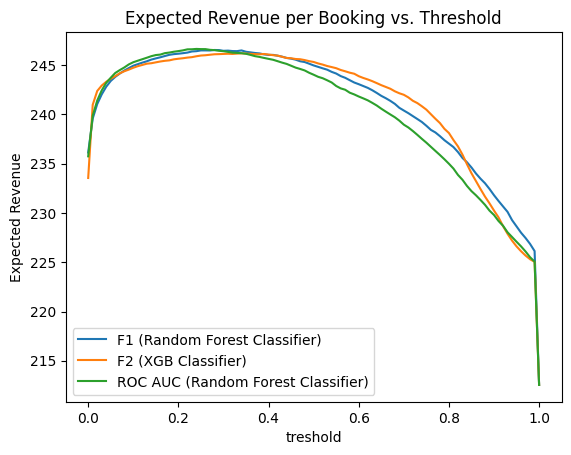

In [369]:
net=(X_test_copy.apply(lambda x: df_median_ADR.at[x['arrival_date_month'], x['hotel']]*(x['stays_in_weekend_nights']+x['stays_in_week_nights']) if x['actual']==0 else 0,axis=1)).mean()
plot_multiple_lines([f1,f2,RA],['F1 (Random Forest Classifier)','F2 (XGB Classifier)','ROC AUC (Random Forest Classifier)'],y_column='Expected Revenue',x_column='treshold')

Berikut merupakan tabel dari besarnya expected revenue berdasarakan threshold terbaik dan berdasarkan threshold 50%.

In [326]:
data = {
    'F1 (Random Forest Classifier)': {'Expected Revenue (threshold : 0.5)': float(f1[f1['treshold']==0.5]['Expected Revenue']), 'Expected Revenue (best threshold)': f1['Expected Revenue'].max(), 'best threshold': f1.sort_values('Expected Revenue',ascending=False).iloc[0,0]},
    'F2 (XGB Classifier)': {'Expected Revenue (threshold : 0.5)': float(f2[f2['treshold']==0.5]['Expected Revenue']), 'Expected Revenue (best threshold)': f2['Expected Revenue'].max(), 'best threshold': f2.sort_values('Expected Revenue',ascending=False).iloc[0,0]},
    'ROC AUC (Random Forest Classifier)': {'Expected Revenue (threshold : 0.5)': float(RA[RA['treshold']==0.5]['Expected Revenue']), 'Expected Revenue (best threshold)': RA['Expected Revenue'].max(), 'best threshold': RA.sort_values('Expected Revenue',ascending=False).iloc[0,0]},
    'None': {'Expected Revenue (threshold : 0.5)': float(net), 'Expected Revenue (best threshold)': '-', 'best threshold': '-'}
}

# Convert the dictionary to a DataFrame
df_ER = pd.DataFrame.from_dict(data, orient='index')
df_ER

,Expected Revenue (threshold : 0.5),Expected Revenue (best threshold),best threshold
F1 (Random Forest Classifier),244.975913,246.54489,0.28
F2 (XGB Classifier),245.327392,246.20927,0.34
ROC AUC (Random Forest Classifier),244.033518,246.652455,0.24
None,212.548072,-,-


Didapatkan bahwa :
1. Niai pendapatan per booking `tanpa melakukan overbooking` adalah sebesar `212.55 euro`
2. Dengan melakukan overbooking pada pesanan yang dianggap akan membatalkan pesanannya dengan `threshold 0.5` didapatkan nilai harapan pendapatan per booking tertinggi dari `model dengan metrik F2 Score tertinggi` yaitu model XGB Classifier yaitu sebesar `244.03 Euro`.
3. Dengan memaksimalkan nilai pendapatan harapan per booking, didapatkan nilai tertinggi didapat oleh `model dengan metrik ROC AUC tertinggi`yaitu Random Forest Clasifier dengan `threshold terbaik sebesar 0.24` dengan nilai `246.65 euro`.
4. Dengan melakukan overbooking didapatkan nilai harapan dari pendapatan meningkat sebesar `34.10 euro` atau sebesar `16%` per bookingnya.

---
## 10. Best Model Evaluation

#### A. Best Model

**Model Dengan Nilai F2 Terbaik**

Model dengan nilai F2 terbaik adalah model Random Forest Classifier dengan rincian sebagai berikut :

|Title|Method|
|-|-|
|Resampler|RandomOverSampler|
|Winsorizer|None|
|Scaler|StandardScaler|
|Model|XGBClassifier( )|

**Model Dengan Nilai Pendapatan Harapan Terbaik**

Model dengan nilai harapan pendapatan terbaik adalah model Random Forest Classifier dengan rincian sebagai berikut :

|Title|Method|
|-|-|
|Metrik|ROC AUC|
|Resampler|RandomOverSampler|
|Winsorizer|None|
|Scaler|StandardScaler|
|Model|RandomForestClassifier('model__learning_rate': 0.01, 'model__max_depth': 6, 'model__n_estimators': 100, 'model__subsample': 0.8)|

#### B. Learning Curve

**Model Dengan Nilai F2 Terbaik**

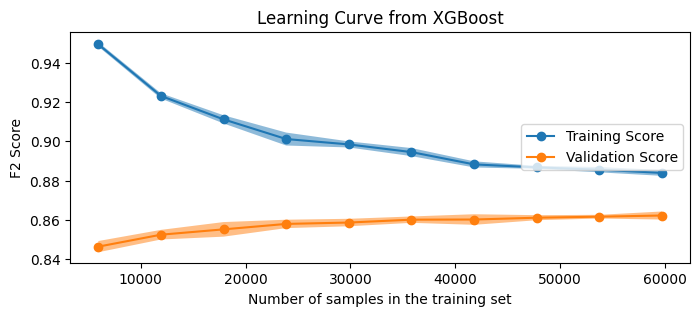

In [370]:
from sklearn.model_selection import LearningCurveDisplay

# Set figure size
fig, ax = plt.subplots(figsize=(8, 3))

# Set the required parameters
common_params={
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1, 10),
    "cv": 3,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {'marker': 'o'},
    "score_name": f2_score
}

# Generate learning curve plot
LearningCurveDisplay.from_estimator(model_pipe_f2, **common_params, ax=ax)

# Set title and legend
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Training Score', 'Validation Score'], loc='center right')
ax.set_title(f'Learning Curve from XGBoost')
ax.set_ylabel('F2 Score')

# Show the plot
plt.show()

Plot ini menunjukkan learning curve dari model XGBoost, yang menggambarkan perubahan skor F2 pada data pelatihan dan validasi ketika ukuran training set bertambah. Sumbu horizontal menunjukkan jumlah sampel dalam training set, sementara sumbu vertikal mewakili skor F2.

Kurva biru (skor pelatihan) dimulai dengan nilai tinggi mendekati 0.94 pada ukuran training set yang kecil, lalu secara bertahap menurun saat ukuran data bertambah, dan akhirnya mendatar di sekitar 0.89. Ini menunjukkan bahwa model mengalami overfitting ketika memiliki sedikit data, tetapi menjadi lebih umum seiring bertambahnya sampel.

Kurva oranye (skor validasi) menunjukkan peningkatan stabil dari sekitar 0.84 hingga 0.86, dan mendatar setelah sekitar 20.000 sampel. Ini menunjukkan bahwa performa model pada data yang tidak terlihat meningkat seiring dengan ukuran pelatihan yang bertambah, tetapi perbaikan melambat di tahap akhir.

Secara keseluruhan, ada kesenjangan antara skor pelatihan dan validasi, yang `menunjukkan adanya overfitting`, meskipun perbedaannya berkurang seiring bertambahnya data pelatihan.

**Model Dengan Nilai Pendapatan Harapan Terbaik**

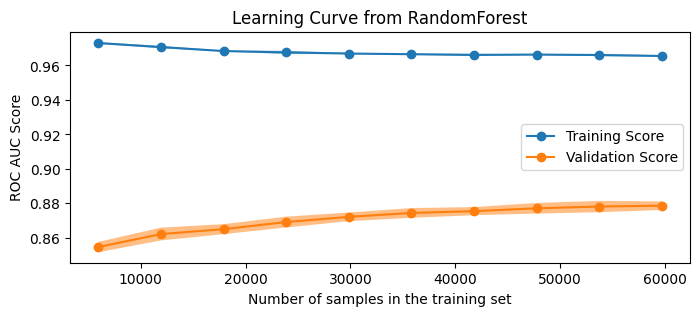

In [360]:
from sklearn.model_selection import LearningCurveDisplay

# Set figure size
fig, ax = plt.subplots(figsize=(8, 3))

# Set the required parameters
common_params={
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1, 10),
    "cv": 3,
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {'marker': 'o'},
    "score_name": 'roc_auc'
}

# Generate learning curve plot
LearningCurveDisplay.from_estimator(final_model_RA, **common_params, ax=ax)

# Set title and legend
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Training Score', 'Validation Score'], loc='center right')
ax.set_title(f'Learning Curve from RandomForest')
ax.set_ylabel('ROC AUC Score')

# Show the plot
plt.show()

Perbedaan yang signifikan antara kedua kurva ini menunjukkan bahwa model RandomForest `cenderung mengalami overfitting`, di mana model belajar terlalu banyak dari data pelatihan dan kurang mampu menggeneralisasi dengan baik pada data validasi.

#### C. Feature Importances

In [338]:
def plot_barchart(df, x_column, y_column):
    """
    Create a bar chart from the given DataFrame with labels on each bar.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    x_column (str): The name of the column to use for the x-axis.
    y_column (str): The name of the column to use for the y-axis.

    Returns:
    None
    """
    # Extract data for plotting
    x_data = df[x_column]
    y_data = df[y_column]
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(x_data, y_data, color='skyblue')
    
    # Set labels and title
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Bar Chart of {y_column} vs {x_column}')
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45, ha='right')
    
    # Add labels on each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height:.2f}', ha='center', va='bottom')
    
    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent label cut-off
    plt.show()

**Model Dengan Nilai F2 Terbaik**

In [375]:
transformer = model_pipe_f2.named_steps['Encoding']
feature_names = transformer.get_feature_names_out()
df_coef = pd.DataFrame({
    "feature" : feature_names, 
    "importances" : model_pipe_f2['model'].feature_importances_
}).sort_values(by='importances', ascending=False)

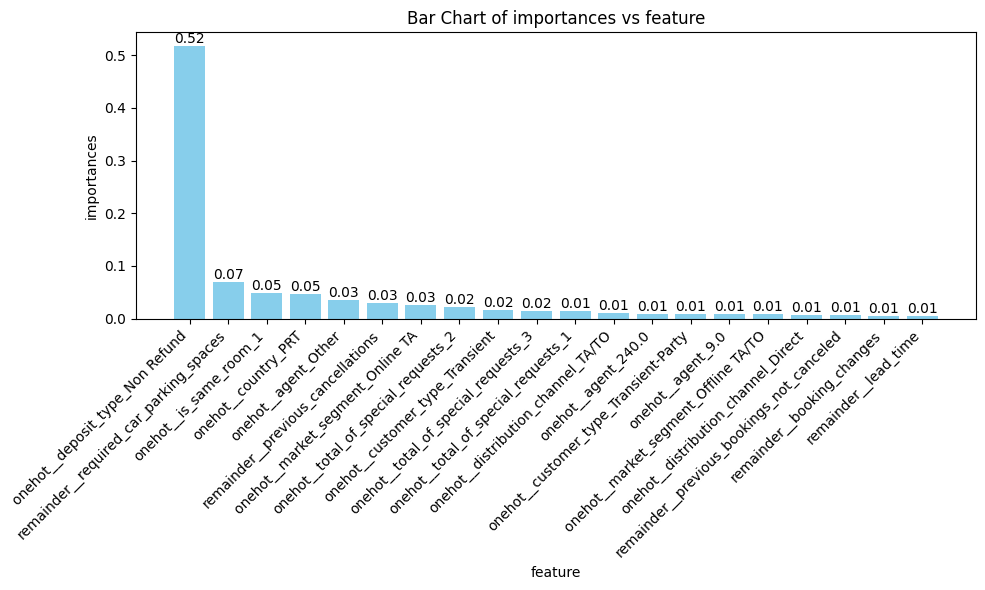

In [376]:
plot_barchart(df_coef.iloc[:20,:], 'feature', 'importances')

Didapatkan bahwa variabel yang paling berpengaruh dalam menentukan apakah suatu pesanan akan batal atau tidak adalah apakah depositnya 'Non Refund', banyaknya parkir mobil yang dibutuhkan, apakah kamar yang dipesan dan didapatkan sama, apakah pemesan berasal dari portugal dan apakah agen dari pemesan dari kelompok 'other'.

**Model Dengan Nilai Pendapatan Harapan Terbaik**

In [373]:
transformer = final_model_RA.named_steps['Encoding']
feature_names = transformer.get_feature_names_out()
df_coef = pd.DataFrame({
    "feature" : feature_names, 
    "importances" : final_model_RA['model'].feature_importances_
}).sort_values(by='importances', ascending=False)

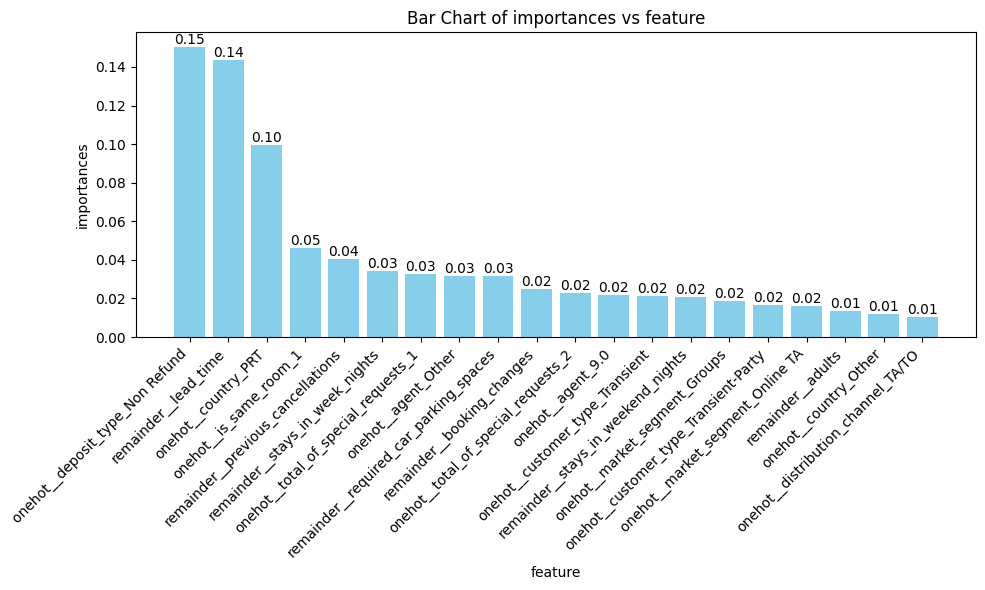

In [374]:
plot_barchart(df_coef.iloc[:20,:], 'feature', 'importances')

Didapatkan bahwa variabel yang paling berpengaruh dalam menentukan apakah suatu pesanan akan batal atau tidak adalah apakah depositnya 'Non Refund', lamanya selisih hari pemesanan dengan hari kedatangan, apakah pemesan berasal dari portugal, apakah kamar yang dipesan dan didapatkan sama, apakah pemesan pernah membatalkan pesanan sebelumnya, dan jumlah malam di hari weekday.

#### D. Confusion Matrix

In [399]:
from sklearn.metrics import precision_recall_fscore_support
def calculate_metrics(y_actual, y_pred):
    # Compute precision, recall, and F-score for positive and negative classes
    precision, recall, _, _ = precision_recall_fscore_support(y_actual, y_pred, average=None, zero_division=0)

    # Assuming binary classification: positive class = 1, negative class = 0
    # precision[0] and recall[0] are for class 0 (negative class)
    # precision[1] and recall[1] are for class 1 (positive class)

    # Create a dictionary for the DataFrame
    metrics = {
        'Positive Recall': [recall[1]],
        'Negative Recall': [recall[0]],
        'Positive Precision': [precision[1]],
        'Negative Precision': [precision[0]]
    }

    # Create DataFrame
    df_metrics = pd.DataFrame(metrics)

    return df_metrics

**Model Dengan Nilai F2 Terbaik**

Berikut merupakan Confusion Matrix dengan rhreshold 0.5 dari model XGB Classifier.

<Axes: >

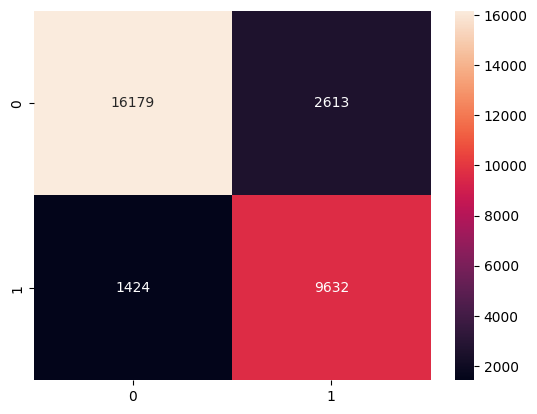

In [408]:
y_pred=model_pipe_f2.predict(X_test)
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

In [409]:
calculate_metrics(y_test, y_pred)

,Positive Recall,Negative Recall,Positive Precision,Negative Precision
0,0.871201,0.860951,0.786607,0.919105


Berikut merupakan Confusion Matrix dengan threshold terbaik yaitu 0.34 dari model XGB Classifier.

<Axes: >

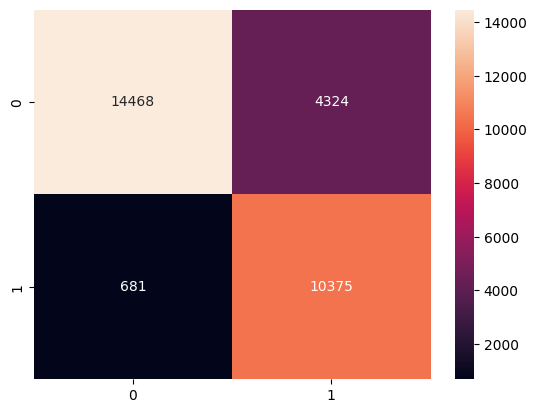

In [410]:
y_prob=model_pipe_f2.predict_proba(X_test)[:,1]
y_pred_thr=[1 if number >= 0.34 else 0 for number in y_prob]
confusion_matrix(y_test, y_pred_thr)
sns.heatmap(confusion_matrix(y_test, y_pred_thr), annot=True, fmt='g')

In [411]:
calculate_metrics(y_test, y_pred_thr)

,Positive Recall,Negative Recall,Positive Precision,Negative Precision
0,0.938404,0.769902,0.70583,0.955047


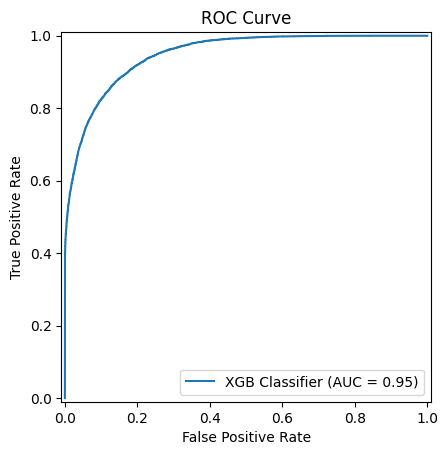

In [444]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, model_pipe_f2.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='XGB Classifier').plot()
plt.title('ROC Curve')
plt.show()

Model yang memiliki nilai ROC AUC sebesar 0.95 menunjukkan kinerja yang sangat baik dalam membedakan antara kelas positif dan negatif

**Model Dengan Nilai Pendapatan Harapan Terbaik**

Berikut merupakan Confusion Matrix dengan threshold 0.5 yaitu 0.34 dari model Random Forest.

<Axes: >

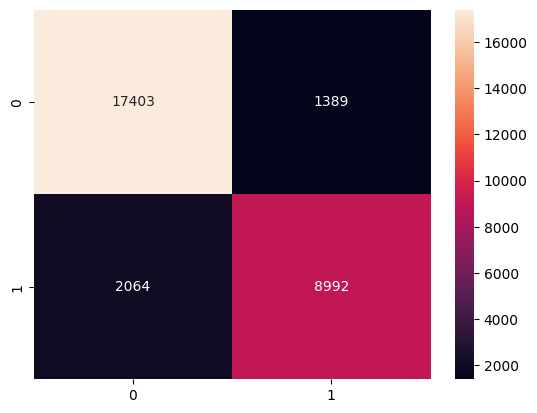

In [412]:
y_pred=final_model_RA.predict(X_test)
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

In [413]:
calculate_metrics(y_test, y_pred)

,Positive Recall,Negative Recall,Positive Precision,Negative Precision
0,0.813314,0.926086,0.866198,0.893974


Berikut merupakan Confusion Matrix dengan threshold terbaik yaitu 0.24 dari model Random Forest.

<Axes: >

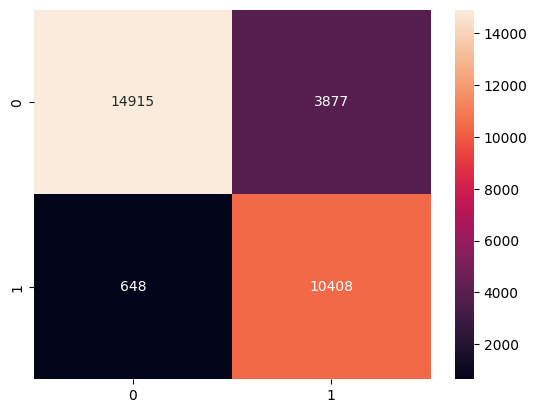

In [414]:
y_prob=final_model_RA.predict_proba(X_test)[:,1]
y_pred_thr=[1 if number >= 0.24 else 0 for number in y_prob]
confusion_matrix(y_test, y_pred_thr)
sns.heatmap(confusion_matrix(y_test, y_pred_thr), annot=True, fmt='g')

In [415]:
calculate_metrics(y_test, y_pred_thr)

,Positive Recall,Negative Recall,Positive Precision,Negative Precision
0,0.941389,0.793689,0.728596,0.958363


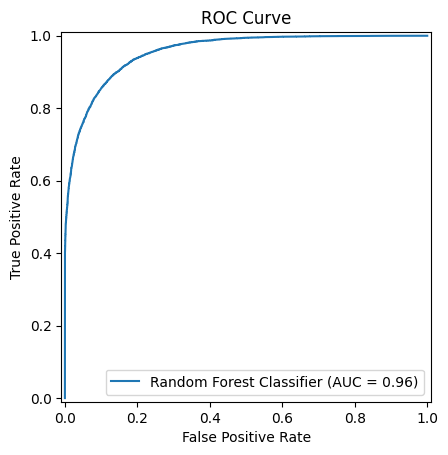

In [442]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, final_model_RA.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest Classifier').plot()
plt.title('ROC Curve')
plt.show()

Model yang memiliki nilai ROC AUC sebesar 0.96 menunjukkan kinerja yang sangat baik dalam membedakan antara kelas positif dan negatif

#### E. Limitasi Model

Berikut merupakan limitasi dari nilai variabel numerikal

In [427]:
df3=df[['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests']]
df3.describe().T[['min','max']]

,min,max
lead_time,0.0,737.0
stays_in_weekend_nights,0.0,19.0
stays_in_week_nights,0.0,50.0
adults,0.0,55.0
children,0.0,10.0
babies,0.0,10.0
previous_cancellations,0.0,26.0
previous_bookings_not_canceled,0.0,72.0
booking_changes,0.0,21.0
days_in_waiting_list,0.0,391.0


Berikut merupakan limitasi dari nilai variabel kategorikal

In [430]:
df3=df[['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','deposit_type','customer_type','is_repeated_guest','agent']]
pd.DataFrame({
    'kolom': df3.columns.values,
    'n_unique': df3.nunique().values,
    'unique': [df3[col].unique() for col in df3.columns]}
).round(3)

,kolom,n_unique,unique
0,hotel,2,"[Resort Hotel, City Hotel]"
1,arrival_date_month,12,"[July, August, September, October, November, D..."
2,meal,5,"[BB, FB, HB, SC, Undefined]"
3,country,177,"[PRT, GBR, USA, ESP, IRL, FRA, nan, ROU, NOR, ..."
4,market_segment,8,"[Direct, Corporate, Online TA, Offline TA/TO, ..."
5,distribution_channel,5,"[Direct, Corporate, TA/TO, Undefined, GDS]"
6,reserved_room_type,10,"[C, A, D, E, G, F, H, L, P, B]"
7,deposit_type,3,"[No Deposit, Refundable, Non Refund]"
8,customer_type,4,"[Transient, Contract, Transient-Party, Group]"
9,is_repeated_guest,2,"[0, 1]"


---
## 11. Kesimpulan dan Saran

#### A. Kesimpulan

**Pemodelan**

1. Didalam pemodelan didapatkan model dengan score ROC-AUC dan score f1 tertinggi adalah model Random Forest Classifier, sedangkan untuk model dengan score f2 tertinggi adalah model XGB classifier.
2. Didalam pemodelan didapatkan model yang terbaik dalam memprediksi pembatalan hotel berdasarkan nilai F2 score adalah model XGBoost Classifier, dengan nilai F2 sebesar 0.8529, namun didalam model ini masih terdapat gejala overfitting.
3. Didalam pemodelan didapatkan model yang terbaik dalam meningkatkan nilai harapan pendapatan adalah Random Forest Classifier dengan threshold terbaik yaitu sebesar 0,24 namun didalam model ini masih terdapat gejala overfitting.

**Bisnis**

1. Variabel yang paling dapat membedakan apakah suatu pesanan akan dibatalkan antara lain adalah apakah depositnya 'Non Refund', banyaknya parkir mobil yang dibutuhkan, apakah kamar yang dipesan dan didapatkan sama, apakah pemesan berasal dari portugal dan apakah agen dari pemesan dari kelompok 'other'.
2. Niai pendapatan per booking yang didapatkan oleh hotel tanpa melakukan overbooking adalah sebesar 212.55 euro
3. Jika pihak hotel melakukan overbooking terhadap kamar yang yang sudah dipesan namun diprediksi akan dibatalkan, pihak hotel diprediksi dapat meningkatkan nilai harapan dari pendapatan sebesar 34.10 euro atau sebesar 16% menjadi 246.65 euro per bookingnya.

#### B. Saran

**Pemodelan**

Dikarenakan pada model yang sudah ada masih terdapat gejala overfitting, model masih dapat ditingkatkan lagi dengan mengeneralkan model, megurangi fitur, dan tuning yang lebih baik.

**Bisnis**

Implementasi overbooking oleh pihak hotel bisa dilakukan dengan memperbolehkan satu kamar dipesan oleh dua pemesan, asalkan pemesan pertama diprediksi akan membatalkan reservasi. Dalam simulasi ini, probabilitas pemesanan kamar diambil dari data historis yang ada dan masih diasumsikan sama antara pemesan reguler dan pemesan overbooking. Kemudian, kerugian yang dihitung dalam simulasi ini juga masih bersifat asumsi. Dalam simulasi, pihak hotel harus membayar 30% dari harga kamar kepada pemesan yang datang dan mendapati kamarnya telah ditempati oleh orang lain. Agar simulasi ini lebih akurat, pihak hotel perlu melakukan perhitungan lebih detail dengan menganalisis data historis terkait kamar yang pernah di-overbook dan menghitung kerugian nyata yang timbul dari praktik overbooking.

Jika hotel belum pernah menerapkan sistem overbooking dan belum mengetahui dampak yang mungkin terjadi, pihak hotel bisa mempertimbangkan untuk menaikkan threshold pada model prediksi yang digunakan. Dengan menaikkan threshold, hanya pemesanan yang memiliki kemungkinan sangat tinggi untuk dibatalkan yang akan dipilih untuk overbooking. Hal ini akan meningkatkan akurasi dalam memprediksi pembatalan, sehingga lebih banyak pemesanan yang diprediksi akan dibatalkan benar-benar dibatalkan. Namun, kelemahannya adalah kemungkinan akan ada lebih banyak pemesanan yang diprediksi akan dibatalkan, tetapi sebenarnya tidak akan dibatalkan. Meskipun demikian, pendekatan ini bisa mengurangi risiko dari kesalahan prediksi pada awal penerapan sistem overbooking.

#### c. Save Model

In [416]:
import pickle

# Define final model
final_model = model_pipe_f2

# Fitting model to all data
final_model.fit(X, y)

# Save Model
pickle.dump(final_model, open('Final Model f2.sav', 'wb'))

In [417]:
# Define final model
final_model = final_model_RA

# Fitting model to all data
final_model.fit(X, y)

# Save Model
pickle.dump(final_model, open('Final Model RA.sav', 'wb'))